In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

In [4]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Part 1: Basic understanding of data

## Trends over months and years

Why I did this:
> Lead levels can vary seasonally due to temperature, water stagnentation and treatment changes, from Elen Botenzo's feedback.

> Understanding monthly and yearly fluctuations.

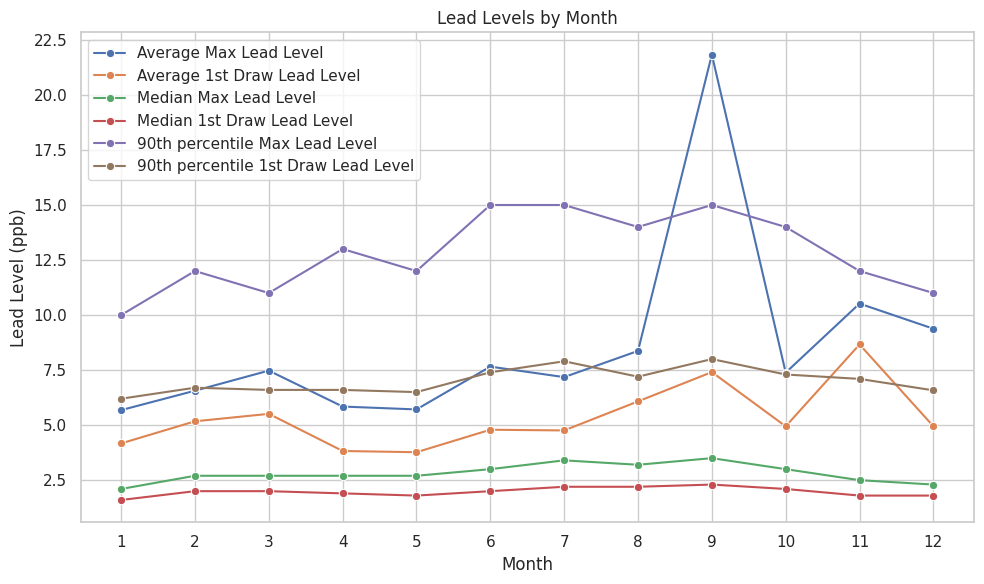

In [5]:
# Extracted time features from sample dates: month, year, day
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Day'] = df['Sample Date'].dt.day

sns.set(style="whitegrid")

# Grouped data by month to analyze trends across a calendar year.
monthly_avg = df.groupby('Month')[['1st Draw', 'Max']].mean().reset_index()
monthly_med = df.groupby('Month')[['1st Draw', 'Max']].median().reset_index()
monthly_90th = df.groupby('Month')[['1st Draw', 'Max']].quantile(0.9).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Max', marker='o', label='Average Max Lead Level')
sns.lineplot(data=monthly_avg, x='Month', y='1st Draw', marker='o', label='Average 1st Draw Lead Level')
sns.lineplot(data=monthly_med, x='Month', y='Max', marker='o', label='Median Max Lead Level')
sns.lineplot(data=monthly_med, x='Month', y='1st Draw', marker='o', label='Median 1st Draw Lead Level')
sns.lineplot(data=monthly_90th, x='Month', y='Max', marker='o', label='90th percentile Max Lead Level')
sns.lineplot(data=monthly_90th, x='Month', y='1st Draw', marker='o', label='90th percentile 1st Draw Lead Level')
plt.title("Lead Levels by Month")
plt.xlabel("Month")
plt.ylabel("Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()

The above graph shows that we have outliers(the mean curves are more erratic) in our data, and we need to consider median for more accurate predictions

## Year-Over-Year Trends by Month

Why:

> We want to detect whether lead levels are improving or worsening over time during the same months.

What I did:

> Grouped by both year and month, then calculated:

>> Mean of Max lead level per group

>> Median of Max lead level per group

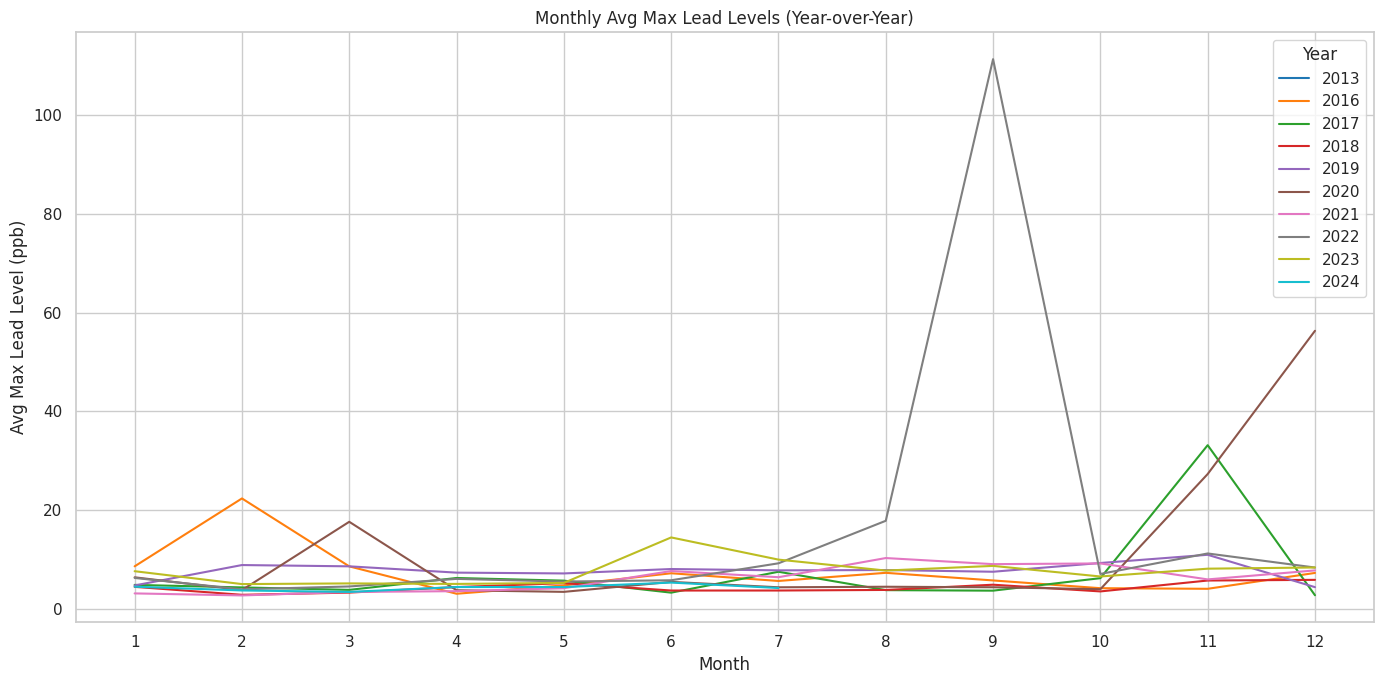

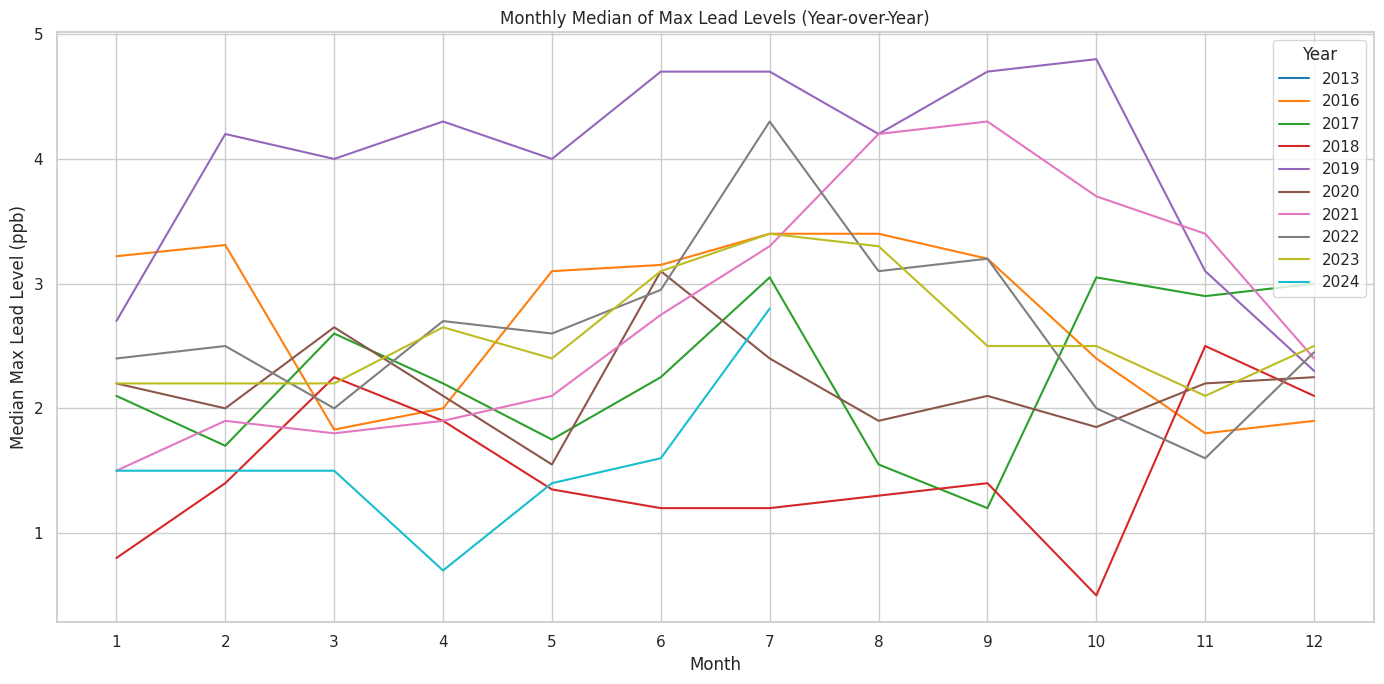

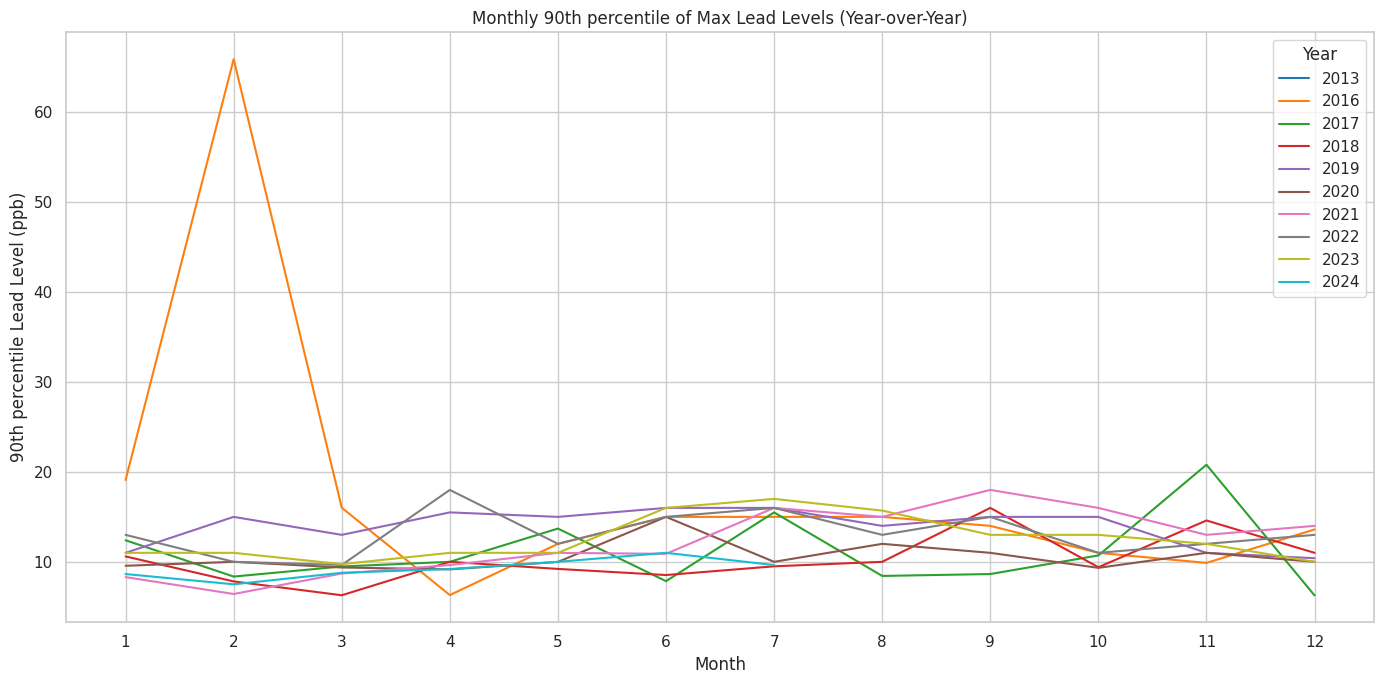

In [6]:
monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].mean().reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly Avg Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

print('')

monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].median().reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly Median of Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("Median Max Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

print('')

monthly_yearly = df.groupby(['Year', 'Month'])[['Max']].quantile(0.9).reset_index()
monthly_yearly['Month_Name'] = pd.to_datetime(monthly_yearly['Month'], format='%m').dt.strftime('%b')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_yearly, x='Month', y='Max', hue='Year', palette='tab10')
plt.title("Monthly 90th percentile of Max Lead Levels (Year-over-Year)")
plt.xlabel("Month")
plt.ylabel("90th percentile Lead Level (ppb)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [7]:
df_2016_feb = df[(df['Sample Date'].dt.year == 2016) & (df['Sample Date'].dt.month == 2)]
df_2016_feb = df_2016_feb.sort_values(by='Max', ascending=False)
df_2016_feb.head(10)
# df_2016_feb.shape

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Max,PIN,Property Class,Neighborhood Code,Land Square Feet,...,tract_pop,tract_white_perc,commissioner_dist,reps_dist,senate_dist,ward,school_elem_district,Month,Year,Day
27255,2016-02-22,36XX W 115TH ST*,272.0,1.21,1.03,272.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,22
19225,2016-02-22,36XX W 115TH ST,272.0,1.21,1.03,272.0,2.423300e+13,203.0,250.0,6250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,22
41983,2016-02-25,62XX S KEDZIE AVE,233.0,3.59,2.74,233.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,25
35586,2016-02-25,62XX S KEDZIE AVE*,233.0,3.59,2.74,233.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,25
24361,2016-02-17,11XX W GEORGE ST,206.0,6.51,6.31,206.0,1.429220e+13,211.0,150.0,3000.0,...,3818.0,0.867732,10th,12.0,6.0,44.0,AGASSIZ,2,2016,17
34878,2016-02-17,11XX W GEORGE ST*,206.0,6.51,6.31,206.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,17
35610,2016-02-19,78XX S JEFFERY AVE*,105.0,0.5,0.50,105.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,19
22705,2016-02-19,78XX S JEFFERY AVE,105.0,0.5,0.50,105.0,2.025420e+13,210.0,80.0,1260.0,...,2828.0,0.011315,4th,5.0,3.0,8.0,MANN,2,2016,19
5600,2016-02-04,3XX W 100TH PL,96.8,3.81,3.08,96.8,2.509410e+13,203.0,330.0,4650.0,...,2720.0,0.000000,4th,27.0,14.0,9.0,"HUGHES, L",2,2016,4
36790,2016-02-04,3XX W 100TH PL*,96.8,3.81,3.08,96.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,4


In [8]:
df_2016_feb['Max'].describe()

,Max
count,120.000000
mean,22.415417
std,54.151121
min,0.500000
25%,1.567500
50%,3.310000
75%,11.275000
max,272.000000


## Analysis with Neighborhoods, ZIPs, and Wards

Why:
> Lead contamination can be dependent on infrastructure age, service line material and socioeconomic factors.

> This grouping helps target high risk areas.

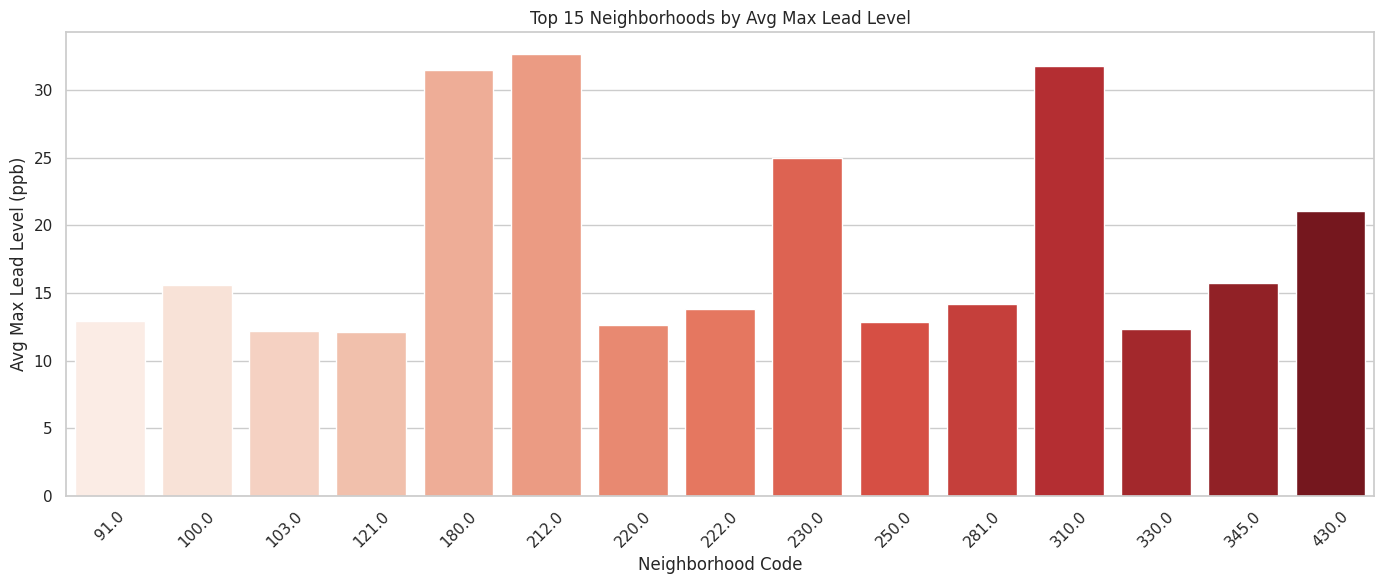

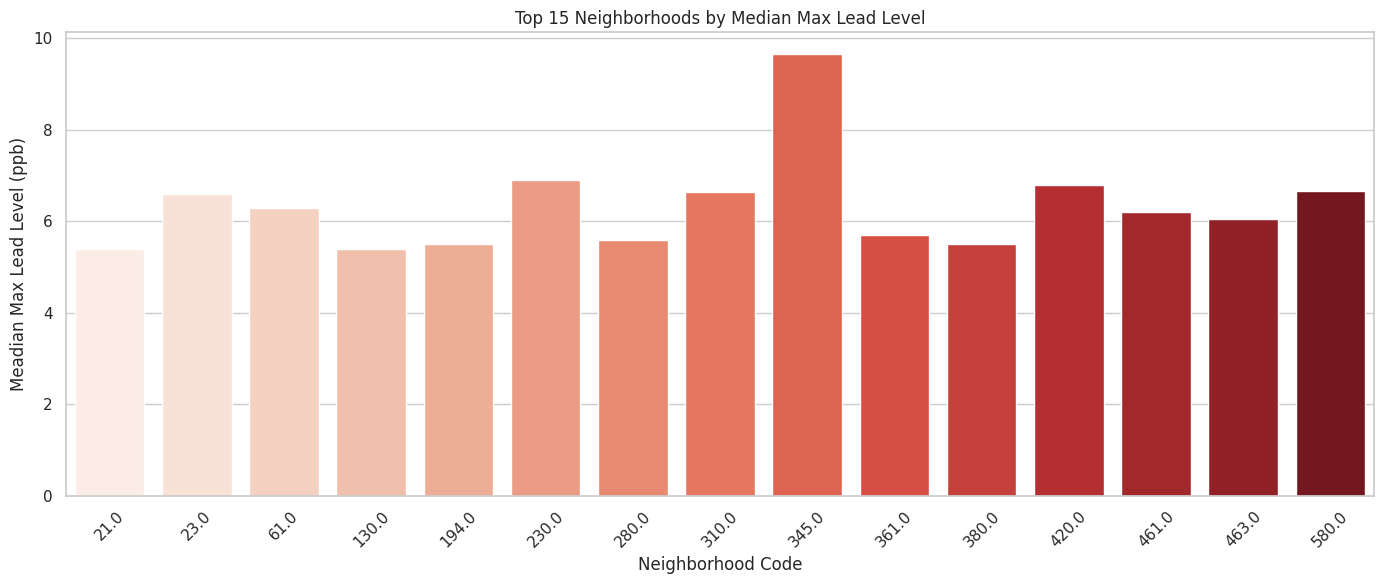

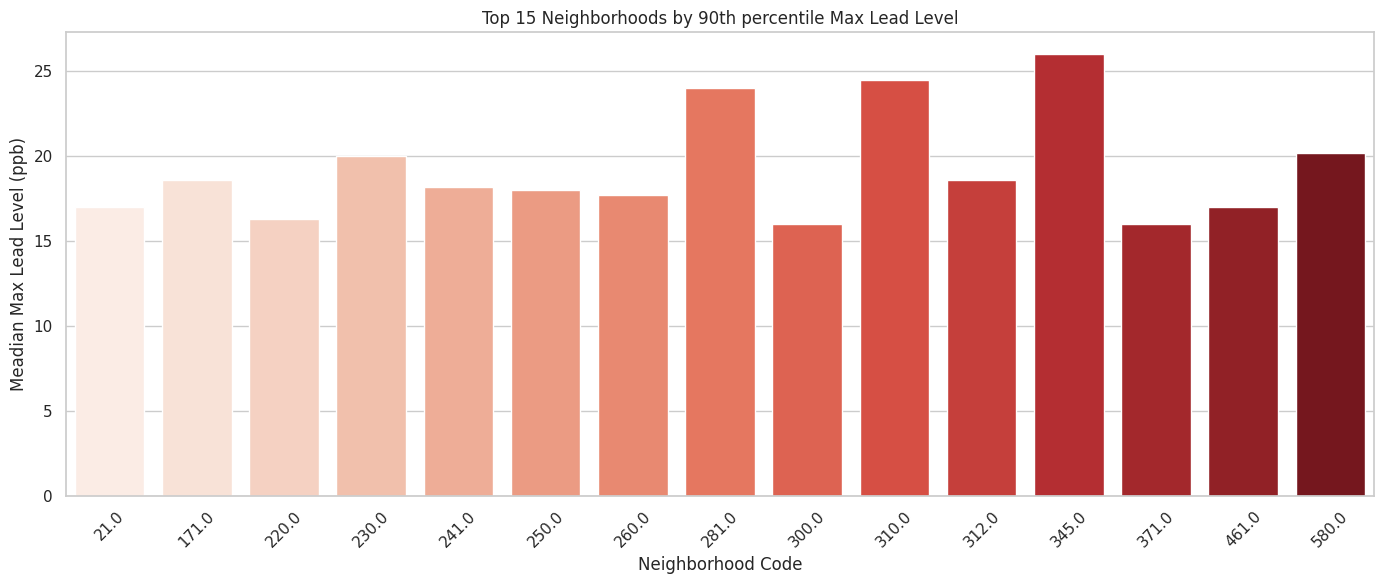

In [9]:
# Group by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by Avg Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MEadian by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by Median Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Meadian Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 90th percentile by Neighborhood
nbhd_avg = df.groupby('Neighborhood Code')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=nbhd_avg.head(15), x='Neighborhood Code', y='Max', palette='Reds')
plt.title("Top 15 Neighborhoods by 90th percentile Max Lead Level")
plt.xlabel("Neighborhood Code")
plt.ylabel("Meadian Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

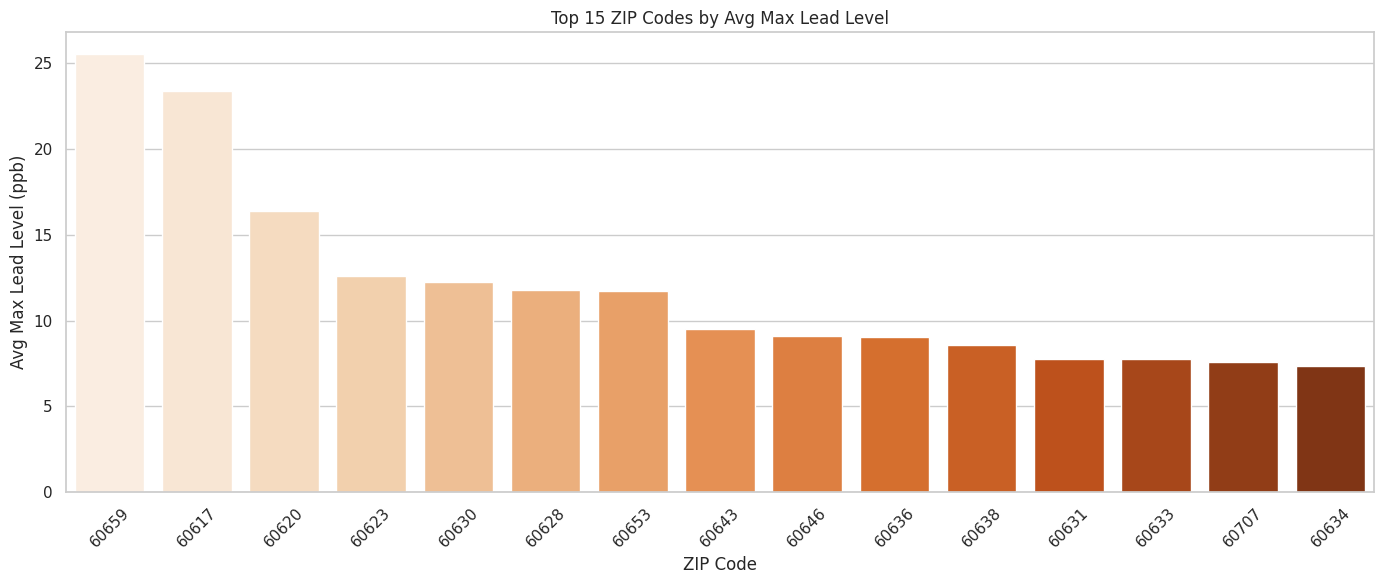

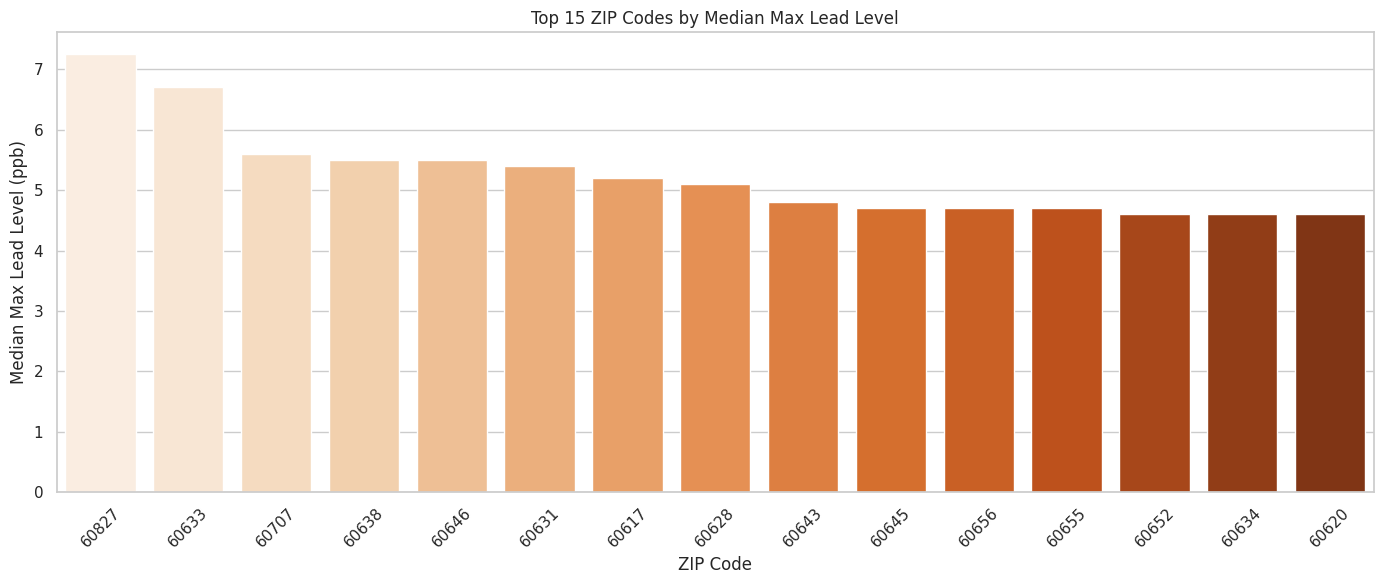

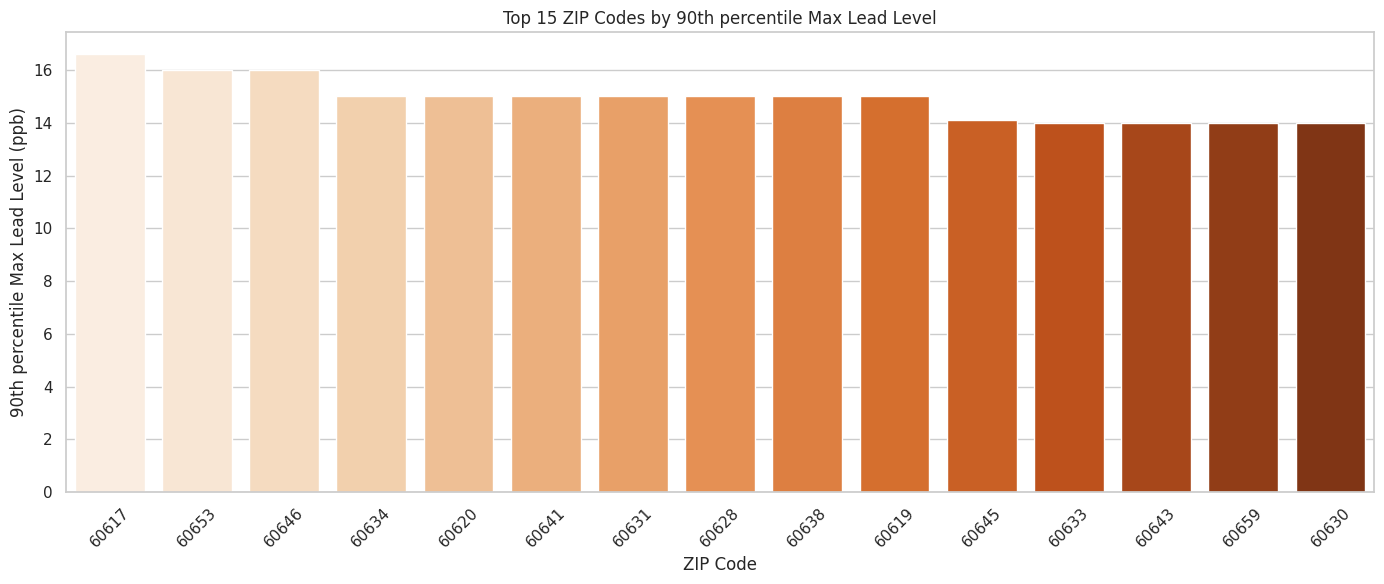

In [10]:
# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by Avg Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by Median Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("Median Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by ZIP (clean it first if needed)
df['ZIP'] = df['property_zip'].str.extract(r'(\d{5})')
zip_avg = df.groupby('ZIP')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=zip_avg.head(15), x='ZIP', y='Max', palette='Oranges')
plt.title("Top 15 ZIP Codes by 90th percentile Max Lead Level")
plt.xlabel("ZIP Code")
plt.ylabel("90th percentile Max Lead Level (ppb)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

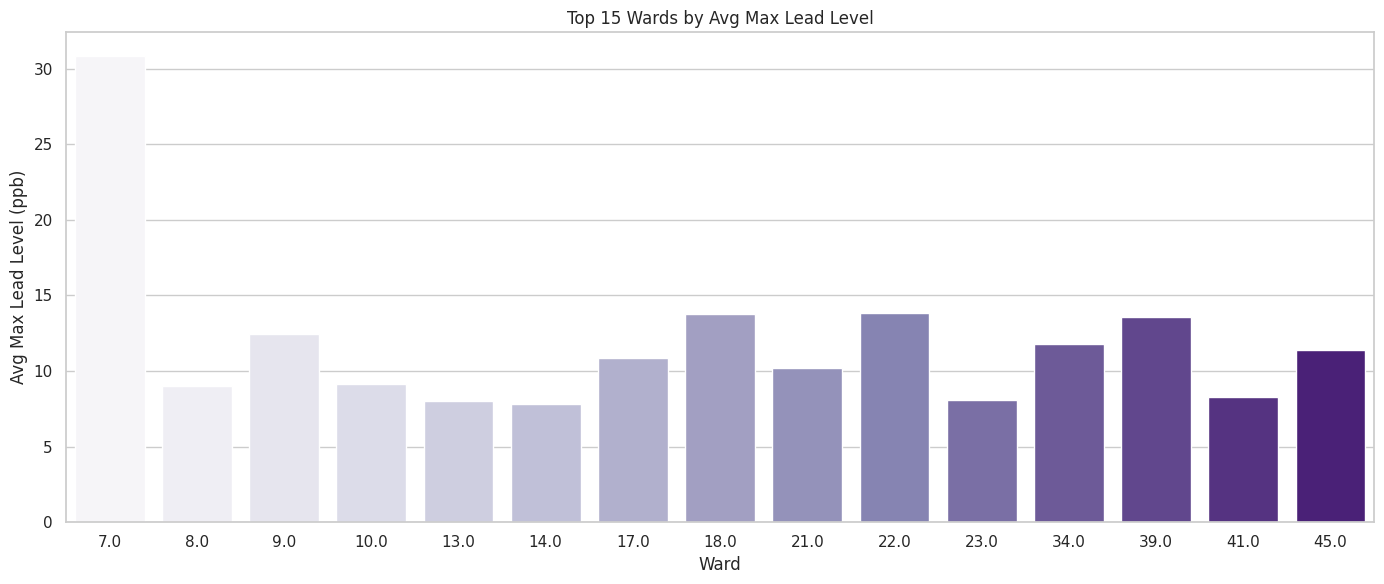

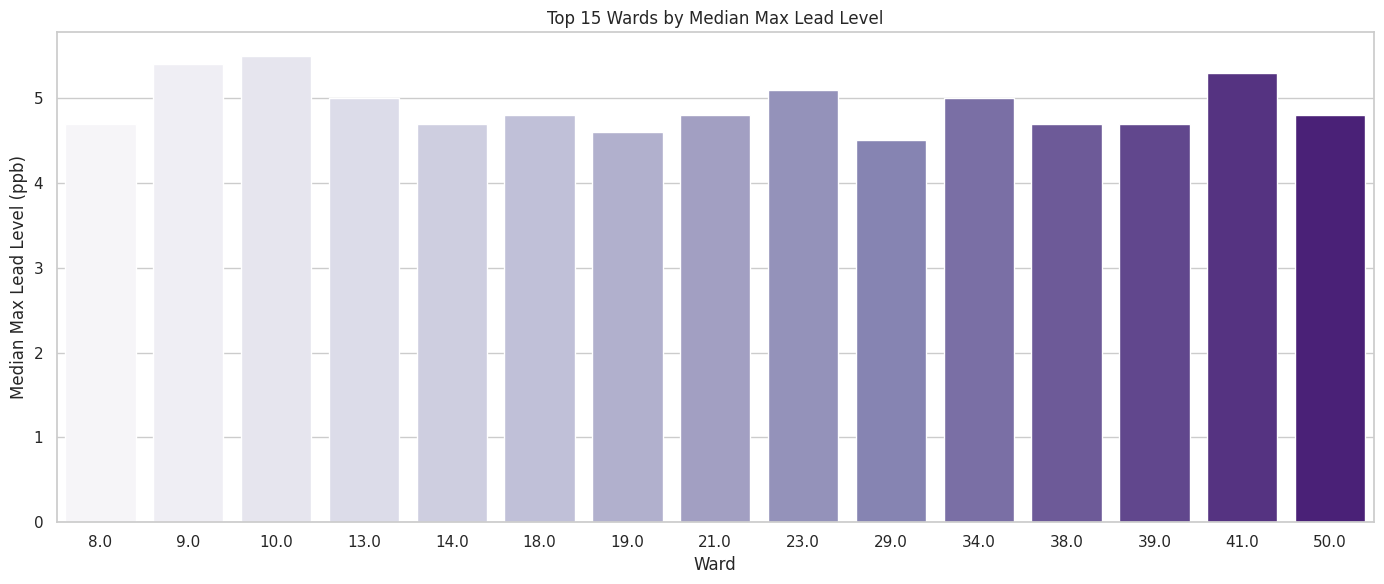

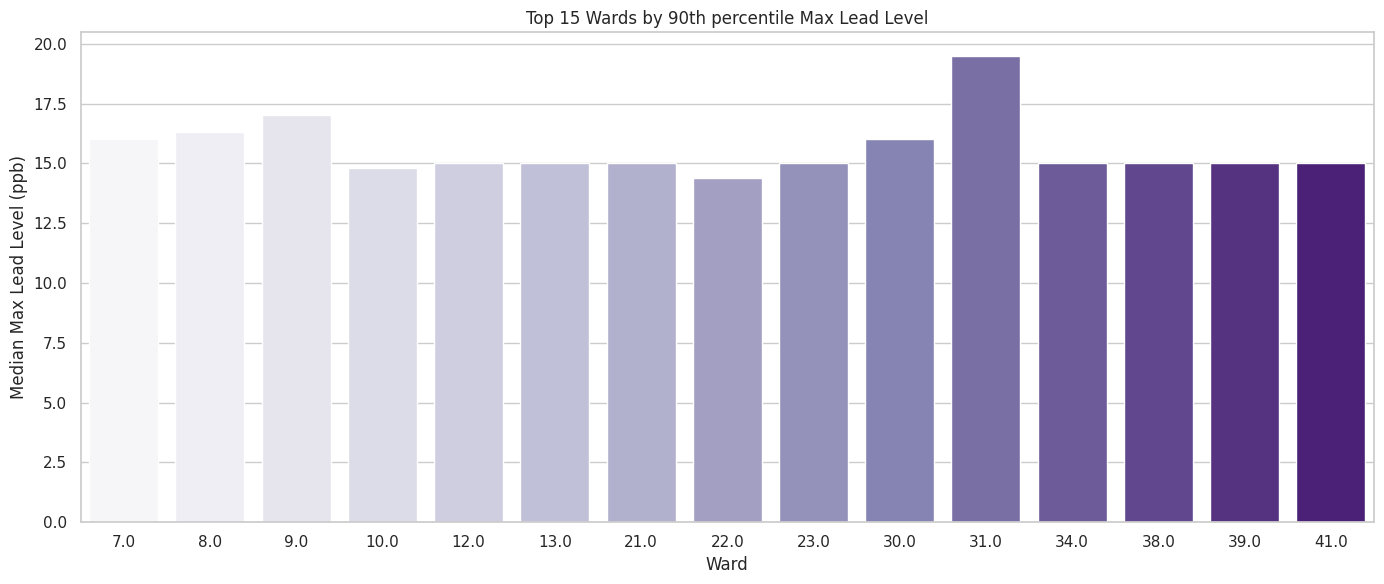

In [11]:
ward_avg = df.groupby('ward')['Max'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by Avg Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Avg Max Lead Level (ppb)")
plt.tight_layout()
plt.show()


ward_avg = df.groupby('ward')['Max'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by Median Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Median Max Lead Level (ppb)")
plt.tight_layout()
plt.show()

ward_avg = df.groupby('ward')['Max'].quantile(0.9).sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=ward_avg.head(15), x='ward', y='Max', palette='Purples')
plt.title("Top 15 Wards by 90th percentile Max Lead Level")
plt.xlabel("Ward")
plt.ylabel("Median Max Lead Level (ppb)")
plt.tight_layout()
plt.show()

# Part 2:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

## Temporal Trend Analysis (90th percentile by Time)

What I did:
 > I shaded June to September every year to see if lead levels increase in summer (a hypothesis based on possible water stagnation due to heat).

 Key takeaway:
 > Lead levels fluctuate, but not strongly in sync with summer. Although I can see the levels rising in atleast half of the summers

In [14]:
# 1. Fix datatypes
df['Sample Date'] = pd.to_datetime(df['Sample Date'])
df['property_zip'] = df['property_zip'].astype(str)
df['Property Class'] = df['Property Class'].astype(str)
df['Town Code'] = df['Town Code'].astype(str)

# Convert numerical columns to floats where applicable
numerical_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max', 'Land Square Feet', 'Building Square Feet', 'Repair Condition']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# 2. Handle missing values
# Impute or drop based on the column context
df['1st Draw'].fillna(df['1st Draw'].median(), inplace=True)  # Median imputation for lead levels
# df.dropna(subset=['Longitude', 'Latitude'], inplace=True)  # Drop rows with missing lat/long

# Group by `year_month` and plot average trends for each lead metric
df['year_month'] = df['Sample Date'].dt.to_period('M')

# Calculate the 90th of lead metrics per year_month
lead_metrics = ['1st Draw', '2/3 Min', '5 Min', 'Max']
avg_trends = df.groupby('year_month')[lead_metrics].quantile(0.9)

df['year'] = df['Sample Date'].dt.year
df['month'] = df['Sample Date'].dt.month
def get_chicago_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

df['season'] = df['month'].apply(get_chicago_season)

df['is_summer'] = df['month'].isin([6, 7, 8, 9])

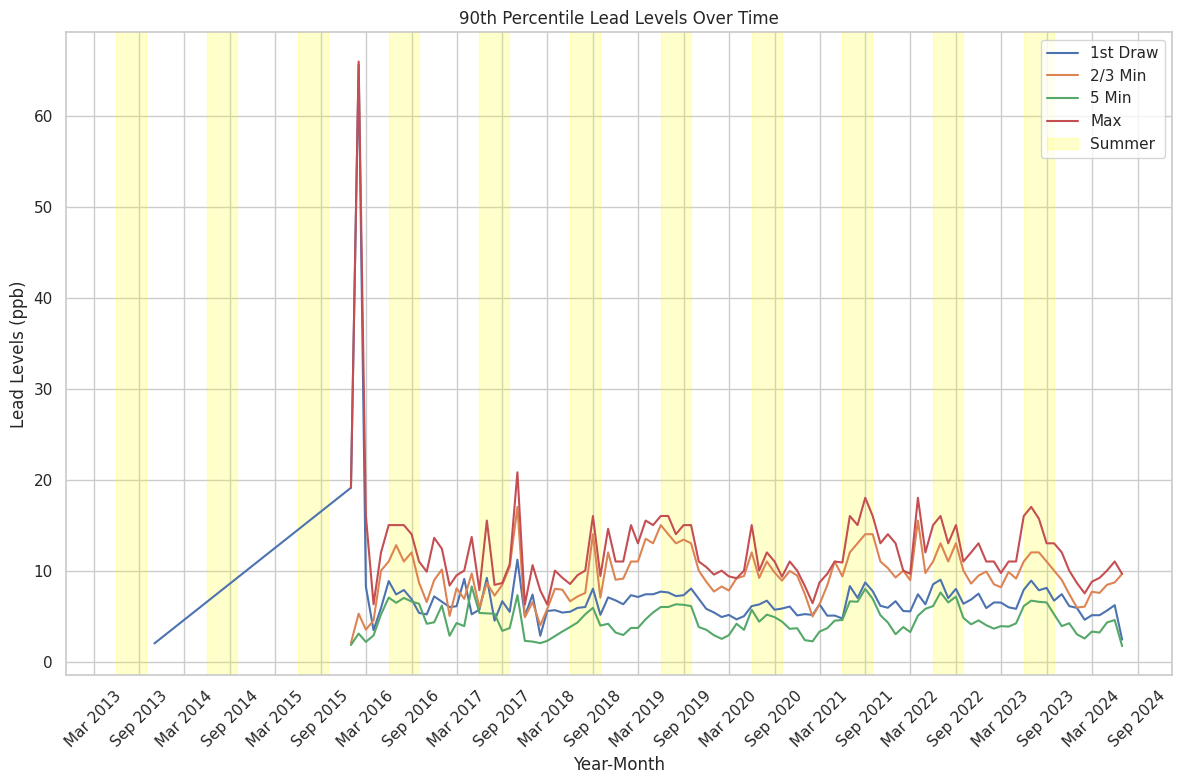

In [15]:
import matplotlib.dates as mdates

# Convert PeriodIndex to datetime
avg_trends.index = avg_trends.index.to_timestamp()

plt.figure(figsize=(12, 8))
for metric in lead_metrics:
    plt.plot(avg_trends.index, avg_trends[metric], label=metric)

# Dynamically add summer shading
for year in range(2013, 2024):
    start = pd.to_datetime(f"{year}-06-01")
    end = pd.to_datetime(f"{year}-09-30")
    plt.axvspan(start, end, color='yellow', alpha=0.2, label='Summer' if year == 2018 else "")

plt.title('90th Percentile Lead Levels Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Lead Levels (ppb)')

# Format x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df_2013 = df[(df['Sample Date'].dt.year == 2013)]
df_2013.head(10)

,Sample Date,Address,1st Draw,2/3 Min,5 Min,Max,PIN,Property Class,Neighborhood Code,Land Square Feet,...,commissioner_dist,reps_dist,senate_dist,ward,school_elem_district,year_month,year,month,season,is_summer
39262,2013-11-09,97XX S LA SALLE ST,2.0,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2013-11,2013.0,11.0,Fall,False


In [17]:
# Calculate Mean, Median, Std for Each Season
seasonal_stats = df.groupby('season')[lead_metrics].agg(['mean', 'median', 'std'])
print("Seasonal Statistics (Mean, Median, Std):\n", seasonal_stats)

Seasonal Statistics (Mean, Median, Std):
         1st Draw                      2/3 Min                        5 Min  \
            mean median         std      mean median         std      mean   
season                                                                       
Fall    6.569184    2.0  117.952798  6.229164    2.3  126.536831  7.549496   
Spring  4.210476    2.0   43.357168  4.268334    2.0   13.768451  2.067003   
Summer  5.090470    2.0   49.582414  5.077832    2.5   26.271539  2.954940   
Winter  4.574021    2.0   30.249714  4.652499    1.5   92.081145  2.365397   

                                 Max                     
       median         std       mean median         std  
season                                                   
Fall      1.5  523.614335  13.384296    3.0  529.735773  
Spring    1.1    7.914902   6.303617    2.7   45.295174  
Summer    1.7   10.202180   7.768839    3.2   56.122925  
Winter    0.5   65.813904   7.209900    2.4   95.961480  


## Statistics Tests:

### Two-Sample Independent T-Test: Summer vs Non-Summer:

> To determine if lead levels during summer months (June–September) are significantly different from the rest of the year.

Variables Tested:

> 1st Draw lead concentration  
> Max lead concentration

Hypotheses:
> For both variables:

>> Null Hypothesis (H₀):
>>> There is no significant difference in lead levels between summer and non-summer months.
>>>> 𝜇(summer) = 𝜇(non-summer)

>> Alternative Hypothesis (H₁):
>>> There is a significant difference in mean lead levels between the two periods.
>>>> 𝜇(summer) ≠ 𝜇(non-summer)

Why T-Test?
> Compares the means of two independent groups
> Assumes approximate normal distribution (central limit theorem applies given sufficient sample size)
> Reasonable robustness to non-normality with large n
> Appropriate for continuous, numeric data (like ppb lead levels)


Results:

> p-values > 0.05, so we fail to reject the null hypothesis for both variables.

> There’s no statistically significant difference in lead levels between summer and non-summer months.

> Cohen's d values < 0.2, indicating a negligible effect size — even if differences existed, they’d be too small to matter practically.

Interpretation:
> There is no statistical evidence that summer differs from non-summer in lead levels.

In [18]:
# Statistical Tests
# 1. T-test: Summer vs Non-Summer for 1st Draw and Max
summer_data = df[df['is_summer'] == 1]
non_summer_data = df[df['is_summer'] == 0]

t_test_1st_draw = stats.ttest_ind(summer_data['1st Draw'].dropna(), non_summer_data['1st Draw'].dropna())
t_test_max = stats.ttest_ind(summer_data['Max'].dropna(), non_summer_data['Max'].dropna())

print(f"T-test for 1st Draw (Summer vs Non-Summer): p-value = {t_test_1st_draw.pvalue:.4f}")
print(f"T-test for Max (Summer vs Non-Summer): p-value = {t_test_max.pvalue:.4f}")

T-test for 1st Draw (Summer vs Non-Summer): p-value = 0.4003
T-test for Max (Summer vs Non-Summer): p-value = 0.1900


There's no statistical evidence that lead levels in summer differ meaningfully from those in non-summer months. The observed differences are too small to have practical significance.

## ANOVA for across all seasons

Do 1st Draw levels differ across all four seasons?

Variable Tested:
> 1st Draw lead concentration

Hypotheses:
> Null Hypothesis (H₀):
>>> The mean lead level is the same across all seasons.
>>>> 𝜇(Winter) = 𝜇(Spring) = 𝜇(Summer) = 𝜇(Fall)​

> Alternative Hypothesis (H₁):
>> At least one seasonal mean is different.

Test used:
> One-way ANOVA
> Used to compare means across more than two groups
> Assumes approximate normality and equal variances
> More robust than conducting multiple t-tests (avoids inflated Type I error)

Tests if at least one group mean is significantly different
Assumes normality & homogeneity of variance

Results:
> p ≈ 0.072, which is greater than 0.05, so we fail to reject the null hypothesis, but it's close to the threshold.

Interpretation:
> This suggests a possible weak seasonal trend, but the evidence isn't strong enough to confirm a statistically significant difference across seasons.

In [19]:
# 2. ANOVA for Lead Levels by Season (1st Draw)
anova_1st_draw = stats.f_oneway(
    df[df['season'] == 'Winter']['1st Draw'].dropna(),
    df[df['season'] == 'Spring']['1st Draw'].dropna(),
    df[df['season'] == 'Summer']['1st Draw'].dropna(),
    df[df['season'] == 'Fall']['1st Draw'].dropna()
)

print(f"ANOVA for 1st Draw (Seasons): p-value = {anova_1st_draw.pvalue:.4f}")

# Result: p = 0.0719 → statistically significant.
# Interpretation: No strong evidence that seasons impact 1st Draw levels.

ANOVA for 1st Draw (Seasons): p-value = 0.0719


In [20]:
# Effect Size for t-test and ANOVA
# Cohen's d for t-test (Summer vs Non-Summer)
cohen_d_1st_draw = (summer_data['1st Draw'].mean() - non_summer_data['1st Draw'].mean()) / np.sqrt((summer_data['1st Draw'].std()**2 + non_summer_data['1st Draw'].std()**2) / 2)
cohen_d_max = (summer_data['Max'].mean() - non_summer_data['Max'].mean()) / np.sqrt((summer_data['Max'].std()**2 + non_summer_data['Max'].std()**2) / 2)

print(f"Cohen's d for 1st Draw (Summer vs Non-Summer): {cohen_d_1st_draw:.4f}")
print(f"Cohen's d for Max (Summer vs Non-Summer): {cohen_d_max:.4f}")

Cohen's d for 1st Draw (Summer vs Non-Summer): 0.0079
Cohen's d for Max (Summer vs Non-Summer): 0.0118


<0.2, Even if the difference was statistically significant, the actual magnitude of difference is too small to matter.

> There’s no strong statistical evidence that summer months have higher (or lower) lead levels compared to other times of the year.

> Lead levels do not fluctuate significantly based on season — there’s no strong seasonal pattern in the data.

## spearman corr(Lead vs. Proxy Variables)

Why Spearman?

> Non-parametric (doesn't assume normality)
> Measures monotonic relationships (can be nonlinear)

We correlated:

> Lead metrics (like 1st Draw)
> Against numeric stagnation proxies (Age, Rooms, Square Feet, etc.)

What we found:
> Some variables (e.g., Age, Total Building Square Feet) show weak to moderate correlation with lead metrics.

> Most correlation values < ±0.3 → so not very strong, but worth exploring further.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
# Step 4: Correlations between numeric proxies and lead metrics
proxy_vars_numeric = ['Age', 'Apartments', 'Land Square Feet', 'Building Square Feet',
                      'Total Building Square Feet', 'Rooms', 'Bedrooms']

lead_metrics = ['1st Draw', '2/3 Min', '5 Min', 'Max']

correlations = {}
for metric in lead_metrics:
    for var in proxy_vars_numeric:
        if var in df.columns and df[var].dtype in [np.float64, np.int64]:
            corr, _ = spearmanr(df[metric], df[var], nan_policy='omit')
            correlations[(var, metric)] = round(corr, 3)

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Spearman Corr'])
correlation_df = correlation_df.reset_index()
correlation_df.columns = ['(Variable, Metric)', 'Spearman Corr']
display(correlation_df.sort_values(by='Spearman Corr', key=abs, ascending=False))

# A negative correlation (ρ < 0) means higher values of that variable are associated with lower lead.
# A positive correlation (ρ > 0) means higher values are associated with higher lead.
# Stronger correlation = value closer to -1 or +1

,"(Variable, Metric)",Spearman Corr
10,"(Building Square Feet, 2/3 Min)",-0.256
24,"(Building Square Feet, Max)",-0.254
12,"(Rooms, 2/3 Min)",-0.238
4,"(Total Building Square Feet, 1st Draw)",-0.236
26,"(Rooms, Max)",-0.235
3,"(Building Square Feet, 1st Draw)",-0.215
8,"(Apartments, 2/3 Min)",-0.215
25,"(Total Building Square Feet, Max)",-0.212
22,"(Apartments, Max)",-0.207
13,"(Bedrooms, 2/3 Min)",-0.201


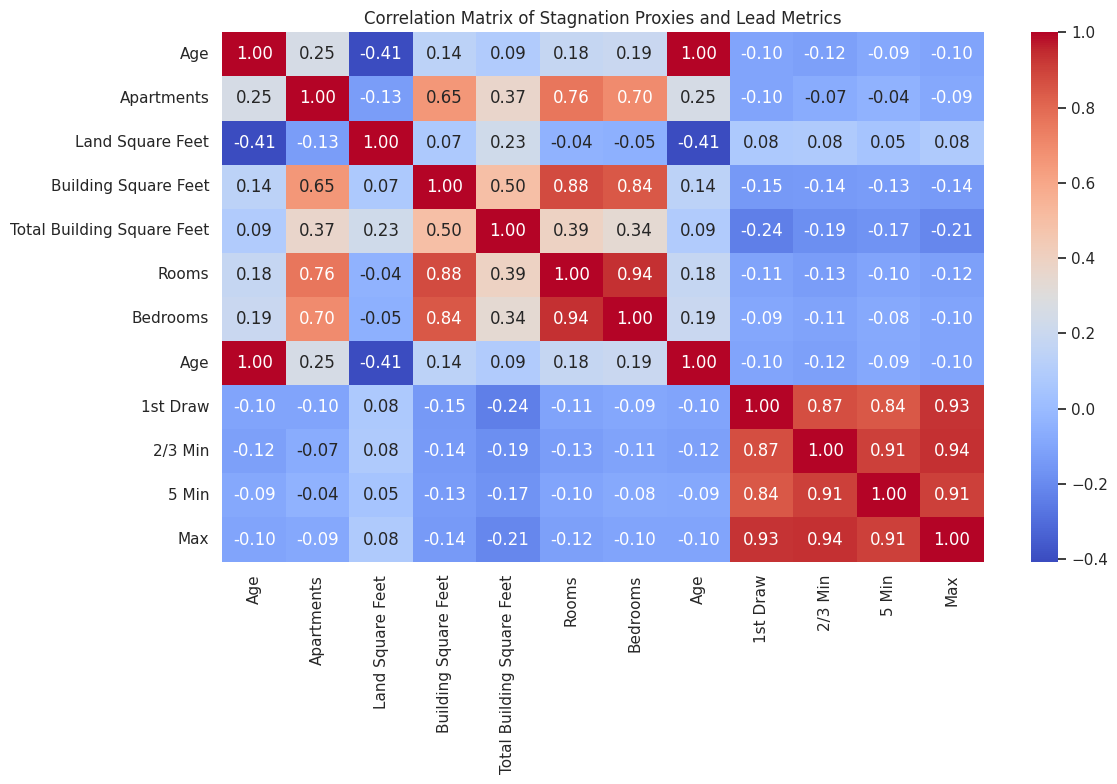

In [23]:
# Step 7: Correlation heatmap with all stagnation proxy vars and lead metrics
selected_vars = proxy_vars_numeric + ['Age'] + lead_metrics
df_corr = df[selected_vars].dropna()

plt.figure(figsize=(12, 8))
corr_matrix = df_corr.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Stagnation Proxies and Lead Metrics")
plt.tight_layout()
plt.show()


In [24]:
# Step 8: Summary of strong candidate features
threshold = 0.2  # adjust as needed
strong_signals = correlation_df[correlation_df['Spearman Corr'].abs() > threshold]
print("Strong candidate stagnation proxy features based on correlation:\n")
display(strong_signals)

Strong candidate stagnation proxy features based on correlation:



,"(Variable, Metric)",Spearman Corr
3,"(Building Square Feet, 1st Draw)",-0.215
4,"(Total Building Square Feet, 1st Draw)",-0.236
8,"(Apartments, 2/3 Min)",-0.215
10,"(Building Square Feet, 2/3 Min)",-0.256
12,"(Rooms, 2/3 Min)",-0.238
13,"(Bedrooms, 2/3 Min)",-0.201
22,"(Apartments, Max)",-0.207
24,"(Building Square Feet, Max)",-0.254
25,"(Total Building Square Feet, Max)",-0.212
26,"(Rooms, Max)",-0.235


## TS01

We're analyzing the monthly average of maximum lead levels in water samples over time using time series analysis techniques.

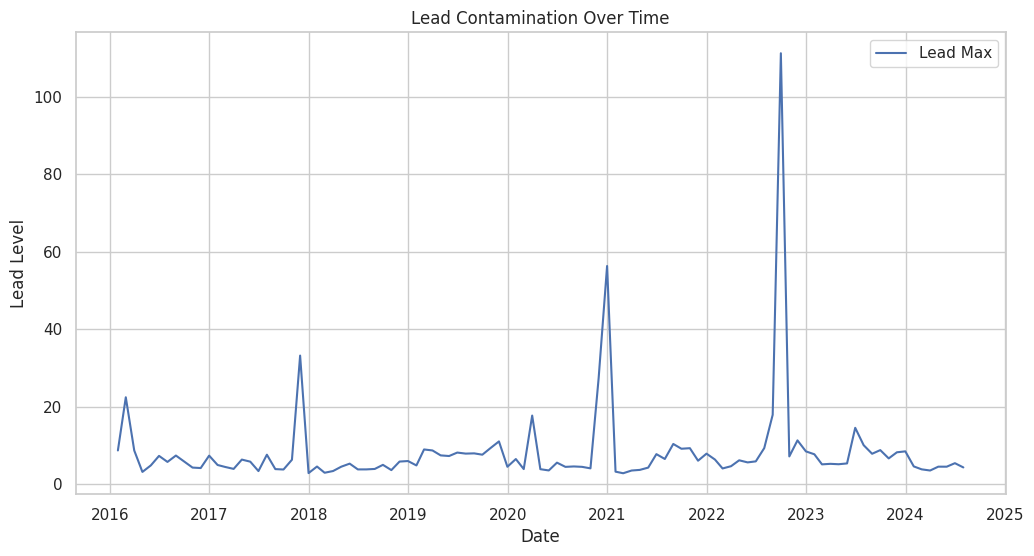

In [25]:
# Read the CSV file with dtype specified to avoid mixed types issue
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv', dtype={'Sample Date': str})

# Convert 'Sample Date' to datetime format
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

# Handle missing values in columns related to lead levels (1st Draw, 2/3 Min, 5 Min, Max)
# Convert columns to numeric (this will convert non-numeric values to NaN)
df[['1st Draw', '2/3 Min', '5 Min', 'Max']] = df[['1st Draw', '2/3 Min', '5 Min', 'Max']].apply(pd.to_numeric, errors='coerce')


# This is just to clean up column names and make them easier to reference in code.
df = df.rename(columns={
    '1st Draw': 'lead_1st_draw',
    '2/3 Min': 'lead_2_3_min',
    '5 Min': 'lead_5_min',
    'Max': 'lead_max'
})


# Set 'Sample Date' as index
df.set_index('Sample Date', inplace=True)

# Resample by month (you can also use 'W' for weekly resampling)
df_monthly = df.resample('M').agg({
    'lead_1st_draw': 'mean',
    'lead_2_3_min': 'mean',
    'lead_5_min': 'mean',
    'lead_max': 'mean'
})

# Handle duplicates by collapsing them (if necessary)
# This may involve aggregating by address or neighborhood
df_monthly = df_monthly.groupby(df_monthly.index).mean()


# I'm visualizing the average monthly max lead levels over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['lead_max'], label='Lead Max')  #  plotting the monthly average of the maximum lead levels over time.
plt.title('Lead Contamination Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()


Key Observations:
> Some months show extreme jumps

> No long-term upward/downward trend

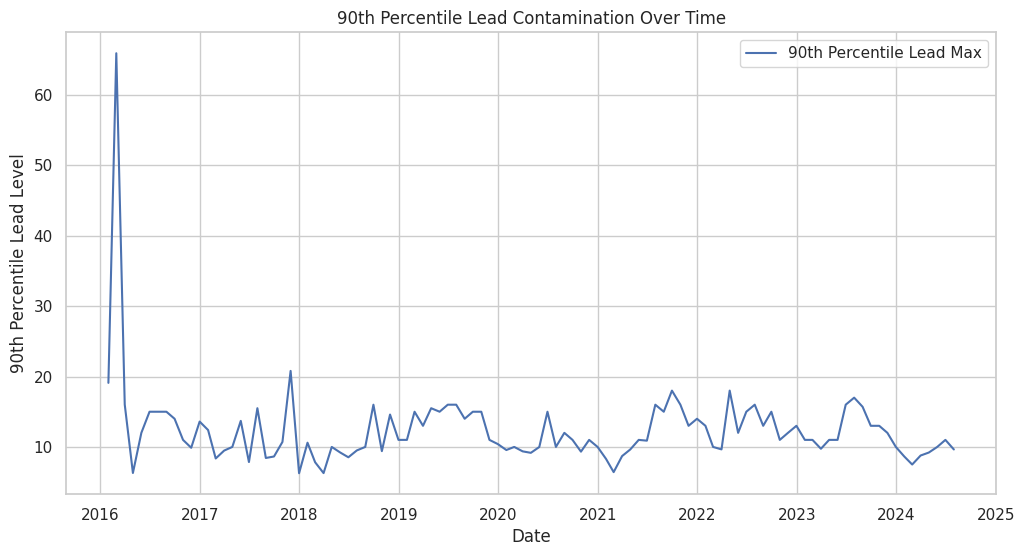

In [26]:
# prompt: # Read the CSV file with dtype specified to avoid mixed types issue
# df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv', dtype={'Sample Date': str})
# # Convert 'Sample Date' to datetime format
# df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
# # Handle missing values in columns related to lead levels (1st Draw, 2/3 Min, 5 Min, Max)
# # Convert columns to numeric (this will convert non-numeric values to NaN)
# df[['1st Draw', '2/3 Min', '5 Min', 'Max']] = df[['1st Draw', '2/3 Min', '5 Min', 'Max']].apply(pd.to_numeric, errors='coerce')
# # This is just to clean up column names and make them easier to reference in code.
# df = df.rename(columns={
#     '1st Draw': 'lead_1st_draw',
#     '2/3 Min': 'lead_2_3_min',
#     '5 Min': 'lead_5_min',
#     'Max': 'lead_max'
# })
# # Set 'Sample Date' as index
# df.set_index('Sample Date', inplace=True)
# # Resample by month (you can also use 'W' for weekly resampling)
# df_monthly = df.resample('M').agg({
#     'lead_1st_draw': 'mean',
#     'lead_2_3_min': 'mean',
#     'lead_5_min': 'mean',
#     'lead_max': 'mean'
# })
# # Handle duplicates by collapsing them (if necessary)
# # This may involve aggregating by address or neighborhood
# df_monthly = df_monthly.groupby(df_monthly.index).mean()
# # I'm visualizing the average monthly max lead levels over time
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
# plt.plot(df_monthly.index, df_monthly['lead_max'], label='Lead Max')  #  plotting the monthly average of the maximum lead levels over time.
# plt.title('Lead Contamination Over Time')
# plt.xlabel('Date')
# plt.ylabel('Lead Level')
# plt.legend()
# plt.show()
# make the above code but for 90th percentile instead of mean

import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file with dtype specified to avoid mixed types issue
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv', dtype={'Sample Date': str})

# Convert 'Sample Date' to datetime format
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')

# Handle missing values in columns related to lead levels (1st Draw, 2/3 Min, 5 Min, Max)
# Convert columns to numeric (this will convert non-numeric values to NaN)
df[['1st Draw', '2/3 Min', '5 Min', 'Max']] = df[['1st Draw', '2/3 Min', '5 Min', 'Max']].apply(pd.to_numeric, errors='coerce')

# Rename columns
df = df.rename(columns={
    '1st Draw': 'lead_1st_draw',
    '2/3 Min': 'lead_2_3_min',
    '5 Min': 'lead_5_min',
    'Max': 'lead_max'
})

# Set 'Sample Date' as index
df.set_index('Sample Date', inplace=True)

# Resample by month and calculate the 90th percentile
df_monthly = df.resample('M').agg({
    'lead_1st_draw': lambda x: x.quantile(0.9),
    'lead_2_3_min': lambda x: x.quantile(0.9),
    'lead_5_min': lambda x: x.quantile(0.9),
    'lead_max': lambda x: x.quantile(0.9)
})

# Handle duplicates (if any)
df_monthly = df_monthly.groupby(df_monthly.index).max() # Use .max() to get the highest 90th percentile value for each month

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['lead_max'], label='90th Percentile Lead Max')
plt.title('90th Percentile Lead Contamination Over Time')
plt.xlabel('Date')
plt.ylabel('90th Percentile Lead Level')
plt.legend()
plt.show()


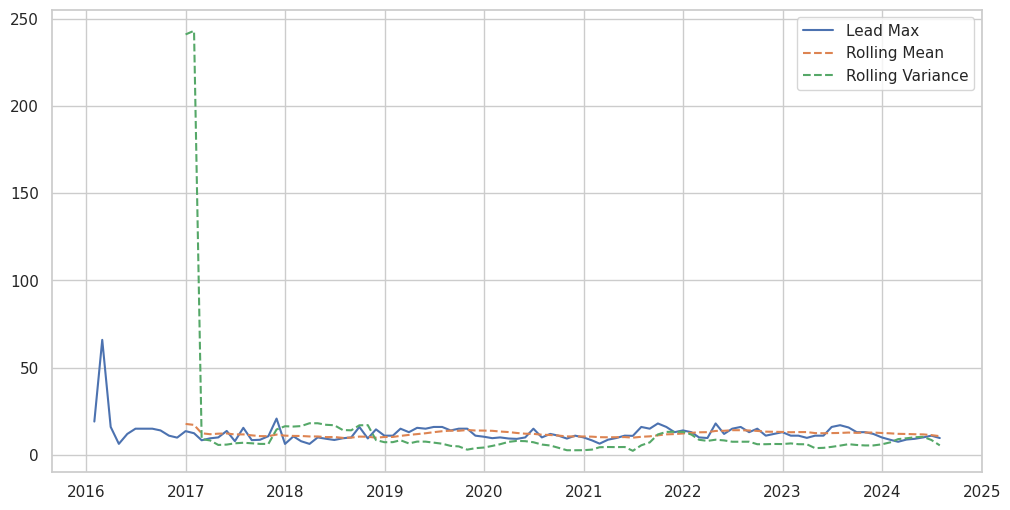

In [27]:
# Plot rolling mean and variance
# Drop rows with missing values
df_monthly = df_monthly.dropna(subset=['lead_max'])

rolling_mean = df_monthly['lead_max'].rolling(window=12).mean()
rolling_variance = df_monthly['lead_max'].rolling(window=12).var()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['lead_max'], label='Lead Max')
plt.plot(df_monthly.index, rolling_mean, label='Rolling Mean', linestyle='--')
plt.plot(df_monthly.index, rolling_variance, label='Rolling Variance', linestyle='--')
plt.legend()
plt.show()

# Rolling Mean not changing much → no trend

# Rolling Variance changes → volatility in some years (especially near spikes)

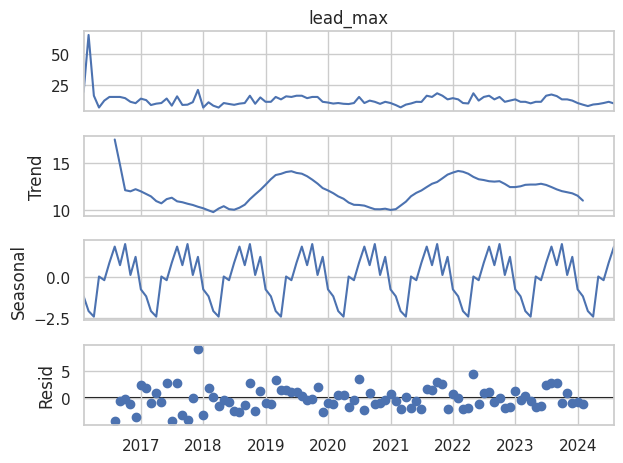

In [28]:
# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_monthly['lead_max'], model='additive', period=12)
result.plot()
plt.show()

# Observed: Original data
# Trend: Underlying slow-moving average
# Seasonal:pattern
# Residual: Random noise/spikes

In [29]:
# Augmented Dickey-Fuller  to check for stationarity
from statsmodels.tsa.stattools import adfuller

# Null hypothesis is that the series is stationary
adf_result = adfuller(df_monthly['lead_max'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# p-value < 0.05 → reject null hypothesis → the data is stationary
# That means: No trend. Seasonality is there, but the structure isn’t drifting.

ADF Statistic: -14.700817916312225
p-value: 2.948650293554313e-27


<Figure size 1200x600 with 0 Axes>

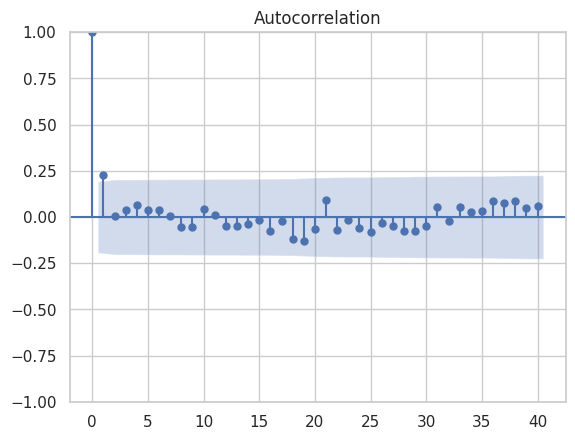

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_monthly['lead_max'], lags=40)
plt.show()

# ACF: peaks at lags 0, 1, 21

<Figure size 1200x600 with 0 Axes>

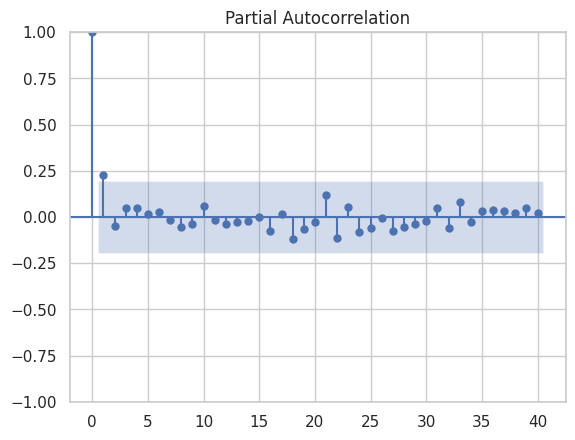

In [31]:
plt.figure(figsize=(12, 6))
plot_pacf(df_monthly['lead_max'], lags=40)
plt.show()
# PACF: Helps decide AR terms (lags) to use in the model, peaks at lags 1, 2, 9, 21, 37

## Part 3: Calender based seasonal trends in lead levels

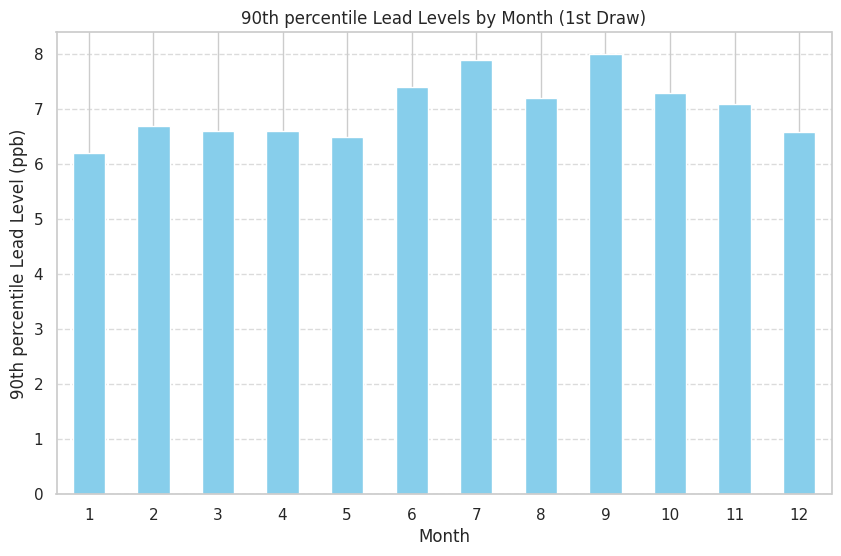

In [32]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract month and year from sample date
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year

# Calculate 90th lead levels by month
monthly_90th = df.groupby('Month')['1st Draw'].quantile(0.9)

# Plot seasonal trends
plt.figure(figsize=(10, 6))
monthly_90th.plot(kind='bar', color='skyblue')
plt.title('90th percentile Lead Levels by Month (1st Draw)')
plt.xlabel('Month')
plt.ylabel('90th percentile Lead Level (ppb)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gradual Increase from 5 to 9, then decrease from 9 to 1

Why
> To prepare the data for seasonal trend analysis.

> Helps us compare lead levels across different seasons, which can reveal environmental effects (like pipe corrosion due to temperature or water usage patterns).

In [33]:
# prompt: df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
# df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
# df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed
# # Extract time components
# df['Month'] = df['Sample Date'].dt.month
# df['Year'] = df['Sample Date'].dt.year
# df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')
# # Convert lead columns to numeric
# lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
# for col in lead_cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
# # Median lead levels by month
# monthly_medians = df.groupby('Month')[lead_cols].median()
# print(monthly_medians)
# # Median lead levels by season
# seasonal_medians = df.groupby('Season')[lead_cols].median()
# print(seasonal_medians)
# Make the above code for the 90th percentile of all the differnet lead_cols instead of the median

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed
# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')
# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# 90th percentile lead levels by month
monthly_90th = df.groupby('Month')[lead_cols].quantile(0.9)
print(monthly_90th)
# 90th percentile lead levels by season
seasonal_90th = df.groupby('Season')[lead_cols].quantile(0.9)
seasonal_90th


       1st Draw  2/3 Min  5 Min   Max
Month                                
1          6.20      8.1    3.0  10.0
2          6.70      8.7    3.2  12.0
3          6.60      9.1    3.4  11.0
4          6.60     11.0    4.0  13.0
5          6.50     10.0    4.8  12.0
6          7.40     11.0    5.6  15.0
7          7.90     12.0    6.0  15.0
8          7.20     12.0    6.1  14.0
9          8.00     13.0    6.6  15.0
10         7.30     12.0    5.7  14.0
11         7.10     10.0    4.1  12.0
12         6.58      9.1    3.8  11.0


,1st Draw,2/3 Min,5 Min,Max
Season,,,,
Cold,6.8,10.0,4.1,12.0
Warm,7.4,12.0,5.9,14.0


In [34]:
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')

# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Median lead levels by month
monthly_medians = df.groupby('Month')[lead_cols].median()
print(monthly_medians)

# Median lead levels by season
seasonal_medians = df.groupby('Season')[lead_cols].median()
print(seasonal_medians)

       1st Draw  2/3 Min  5 Min  Max
Month                               
1           1.6      1.2    0.5  2.1
2           2.0      1.7    0.6  2.7
3           2.0      1.9    0.8  2.7
4           1.9      2.0    1.1  2.7
5           1.8      2.0    1.2  2.7
6           2.0      2.3    1.5  3.0
7           2.2      2.7    1.8  3.4
8           2.2      2.6    1.8  3.2
9           2.3      2.7    1.8  3.5
10          2.1      2.4    1.5  3.0
11          1.8      1.7    1.1  2.5
12          1.8      1.4    0.6  2.3
        1st Draw  2/3 Min  5 Min  Max
Season                               
Cold         1.9      1.8    1.0  2.6
Warm         2.1      2.5    1.6  3.2


In [35]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])  # drop if date conversion failed

# Extract time components
df['Month'] = df['Sample Date'].dt.month
df['Year'] = df['Sample Date'].dt.year
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in [5, 6, 7, 8, 9] else 'Cold')

# Convert lead columns to numeric
lead_cols = ['1st Draw', '2/3 Min', '5 Min', 'Max']
for col in lead_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mean lead levels by month
monthly_mean = df.groupby('Month')[lead_cols].mean()
print(monthly_mean)

# Median lead levels by season
seasonal_mean = df.groupby('Season')[lead_cols].mean()
print(seasonal_mean)

       1st Draw   2/3 Min      5 Min        Max
Month                                          
1      4.169805  3.378449   1.508135   5.681356
2      5.174270  3.382382   1.542268   6.563880
3      5.512456  4.129071   1.832157   7.476250
4      3.825598  4.466494   2.108320   5.843766
5      3.769448  4.170219   2.244721   5.713358
6      4.791282  5.292882   3.068127   7.657380
7      4.758783  5.155711   2.919218   7.181074
8      6.078307  4.851624   2.903764   8.370757
9      7.409592  8.705800  17.576010  21.831355
10     4.946231  5.012813   2.626484   7.384557
11     8.663733  4.867964   2.037497  10.520722
12     4.947590  7.226195   4.063894   9.379635
        1st Draw   2/3 Min     5 Min        Max
Season                                         
Cold    5.405353  4.643347  2.234253   7.606266
Warm    5.446884  5.645852  5.730635  10.211860


In [36]:
# Median lead levels by month
monthly_90th = df.groupby('Month')[lead_cols].quantile(0.9)
print(monthly_90th)

# Median lead levels by season
seasonal_90th = df.groupby('Season')[lead_cols].quantile(0.9)
print(seasonal_90th)

       1st Draw  2/3 Min  5 Min   Max
Month                                
1          6.20      8.1    3.0  10.0
2          6.70      8.7    3.2  12.0
3          6.60      9.1    3.4  11.0
4          6.60     11.0    4.0  13.0
5          6.50     10.0    4.8  12.0
6          7.40     11.0    5.6  15.0
7          7.90     12.0    6.0  15.0
8          7.20     12.0    6.1  14.0
9          8.00     13.0    6.6  15.0
10         7.30     12.0    5.7  14.0
11         7.10     10.0    4.1  12.0
12         6.58      9.1    3.8  11.0
        1st Draw  2/3 Min  5 Min   Max
Season                                
Cold         6.8     10.0    4.1  12.0
Warm         7.4     12.0    5.9  14.0


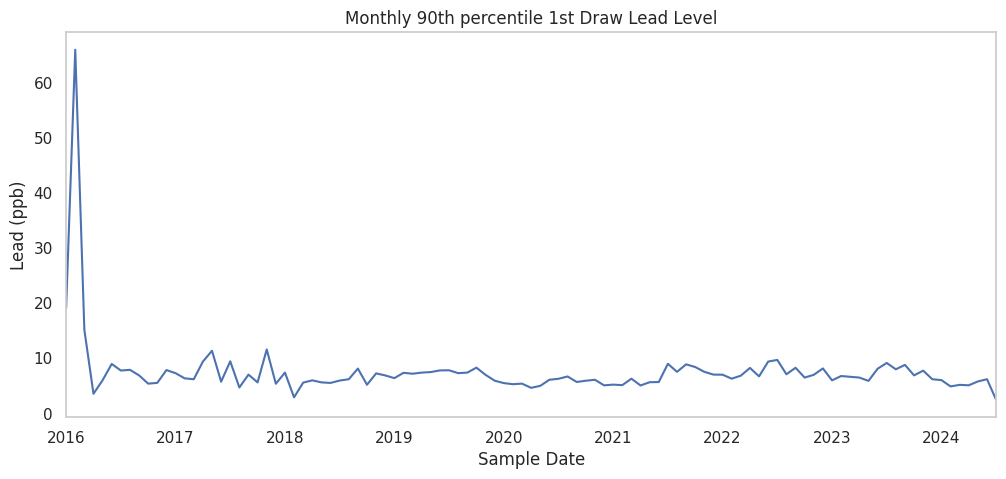

In [37]:
# Monthly 90th aggregation for 1st Draw
monthly_df = df.set_index('Sample Date').resample('M')['1st Draw'].quantile(0.9).dropna()

# Quick plot to visualize trend
import matplotlib.pyplot as plt

monthly_df.plot(title='Monthly 90th percentile 1st Draw Lead Level', ylabel='Lead (ppb)', figsize=(12, 5))
plt.grid()
plt.show()

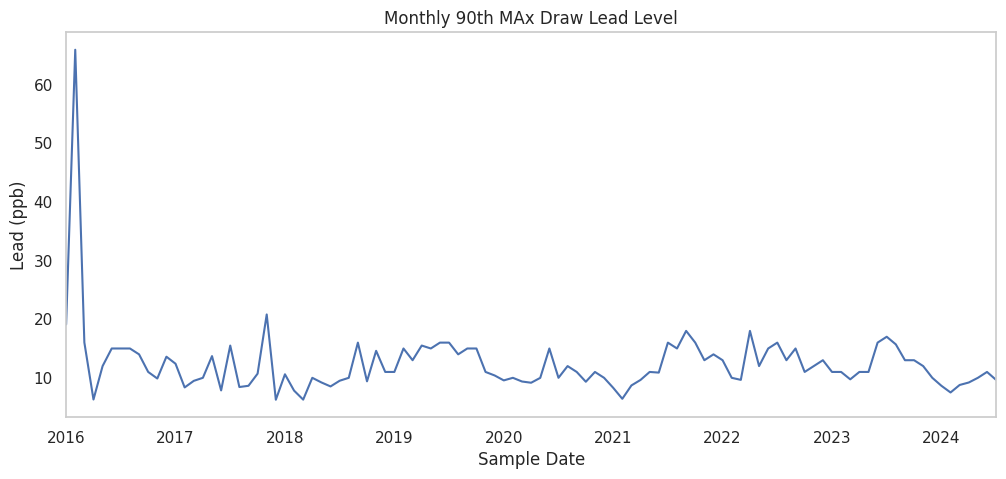

In [38]:
# Monthly 90th aggregation for Max Draw
monthly_df = df.set_index('Sample Date').resample('M')['Max'].quantile(0.9).dropna()

# Quick plot to visualize trend
import matplotlib.pyplot as plt

monthly_df.plot(title='Monthly 90th MAx Draw Lead Level', ylabel='Lead (ppb)', figsize=(12, 5))
plt.grid()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_df)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')  # p-value less than 0.001 and ADF = -4,1, stationarity confirmed

ADF Statistic: -14.700817916312225
p-value: 2.948650293554313e-27


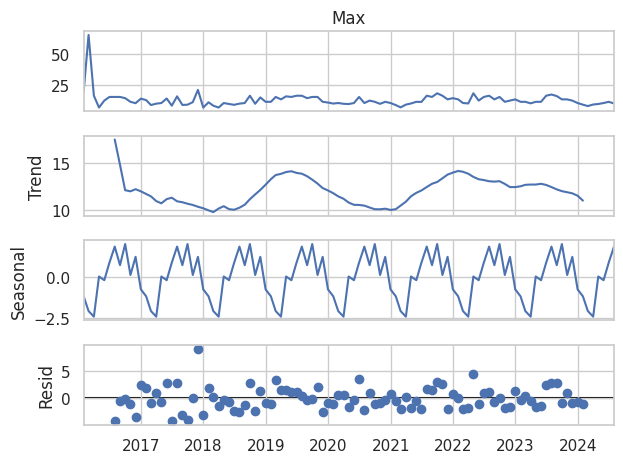

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(monthly_df, model='additive')
decomp.plot()
plt.show()


In [41]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], 1, x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(monthly_df,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit(disp=False)
            print(f'SARIMA{param}x{param_seasonal}12 - AIC:{results.aic:.2f}')
        except:
            continue

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:608.49
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:425.97
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:438.17
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:424.61
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:529.46
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:397.46
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:412.80
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:390.13
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:581.42
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:409.57
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:410.73
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.58
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:521.05
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:399.37
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:405.64
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:390.75


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Log-transform to stabilize variance (optional but often helps) ===
monthly_df_log = np.log1p(monthly_df)  # log1p is safer if there are 0 values

# === 2. SARIMA Model with simplified seasonal MA(1) ===
model = SARIMAX(
    monthly_df,
    order=(0, 1, 1),                    # Try adding a slight AR term
    seasonal_order=(1, 1, 1, 12),       # Standard seasonal setup
    # trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

# === 3. Fit model ===
results = model.fit(method='lbfgs')  # or 'powell', 'bfgs', 'nm' if needed
print(results.summary())

# === 4. Plot diagnostics ===
# results.plot_diagnostics(figsize=(12, 8))
# plt.tight_layout()
# plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                Max   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -191.063
Date:                            Sun, 20 Apr 2025   AIC                            390.126
Time:                                    22:14:31   BIC                            399.449
Sample:                                01-31-2016   HQIC                           393.852
                                     - 07-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6346      0.113     -5.601      0.000      -0.857      -0.413
ar.S.L12      -0.1418      0.055   

AIC = -5.309
> Lower AIC is better, and this is the best of the stable models we've tried. Given 103 observations, this is a very solid fit.

ma.L1 (-0.6341)
> Strong and statistically significant (p < 0.001). Indicates a meaningful moving average component: current value is impacted by recent shocks.

Seasonal terms significant:

> ar.S.L12 = -0.2354, ma.S.L12 = -0.4955
>> Captures seasonal autoregressive component (yearly pattern). Significant at p = 0.001.
>> Seasonal MA term, also strongly significant (p = 0.001). Helps correct for yearly seasonal shocks.

> sigma² = 0.0472
>> Variance of the residuals – fairly low, which is great for predictive performance.

📊 Model checks (at bottom):

> Ljung-Box p = 0.27
>> No autocorrelation left in residuals

> Jarque-Bera p = 0.43
>> Residuals look kinda normal ✅

>Heteroskedasticity p = 0.00
>> Some heteroskedasticity

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Log-transform to stabilize variance (optional but often helps) ===
# monthly_df_log = np.log1p(monthly_df)  # log1p is safer if there are 0 values

# === 2. SARIMA Model with simplified seasonal MA(1) ===
model = SARIMAX(
    monthly_df,
    order=(0, 1, 1),                    # Try adding a slight AR term
    seasonal_order=(1, 1, 1, 12),       # Standard seasonal setup
    # trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

# === 3. Fit model ===
results = model.fit(method='lbfgs')  # or 'powell', 'bfgs', 'nm' if needed
print(results.summary())

# === 4. Plot diagnostics ===
# results.plot_diagnostics(figsize=(12, 8))
# plt.tight_layout()
# plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                Max   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -191.063
Date:                            Sun, 20 Apr 2025   AIC                            390.126
Time:                                    22:14:32   BIC                            399.449
Sample:                                01-31-2016   HQIC                           393.852
                                     - 07-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6346      0.113     -5.601      0.000      -0.857      -0.413
ar.S.L12      -0.1418      0.055   

AIC = 390.126
> Lower AIC is better. While this isn’t the lowest possible, it’s quite reasonable given the seasonal complexity and 103 observations. Indicates a decent model fit.Lower AIC is better. While this isn’t the lowest possible, it’s quite reasonable given the seasonal complexity and 103 observations. Indicates a decent model fit.

ma.L1 = -0.6346
> Strong and statistically significant (p < 0.001). Suggests that recent noise/shocks have a noticeable inverse effect on the current value — classic MA(1) behavior.

Seasonal terms significant:

> ar.S.L12 = -0.1418, ma.S.L12 = -0.5380
>> Significant seasonal AR component (p = 0.010). Captures a repeating yearly pattern—though the strength isn’t huge, it’s still meaningful.
>> Very strong seasonal MA term (p = 0.001). Helps the model adjust for regular yearly shocks in the series.

> sigma² = 8.5192
>> This is the estimated variance of the residuals. It’s on the higher side (compared to earlier examples), indicating there’s still some noise in the predictions—but not wildly high.

📊 Model checks (at bottom):

> Ljung-Box p = 0.40
>> No evidence of autocorrelation left in the residuals — good!

> Jarque-Bera p = 0.17
>> Residuals are fairly normal. Not perfect, but definitely within acceptable range

> Heteroskedasticity p = 0.00
>> Some heteroskedasticity might be present

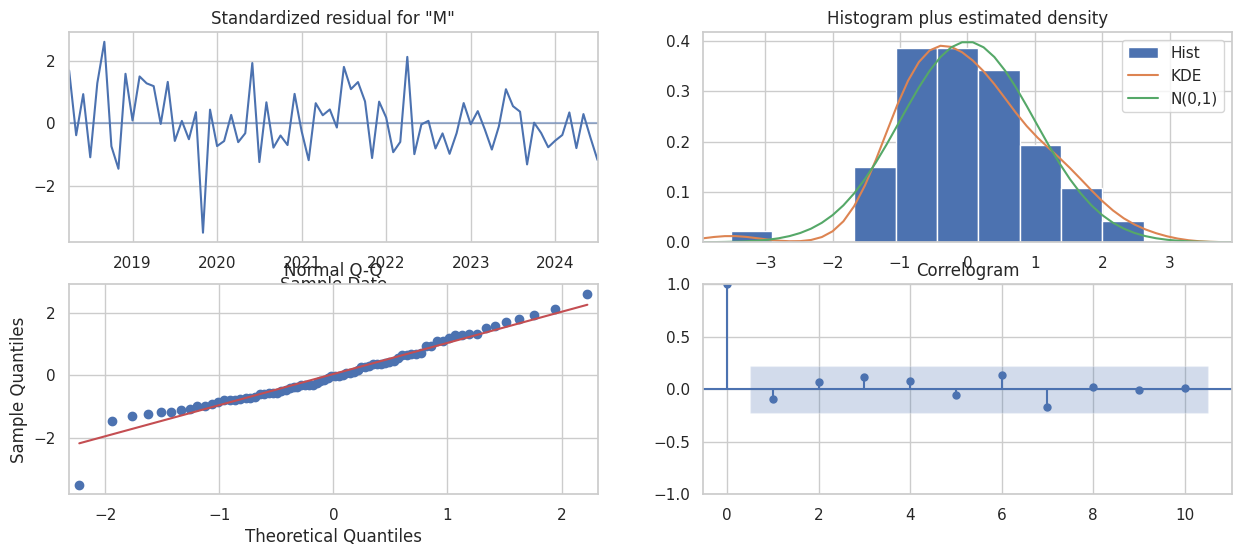

In [44]:
results.plot_diagnostics(figsize=(15, 6))
plt.show()

Why:

> Shows where lead contamination is expected to go.

> Helps city officials or planners prepare for dangerous periods.

> Highlights specific spikes that may need policy investigation or repair work.

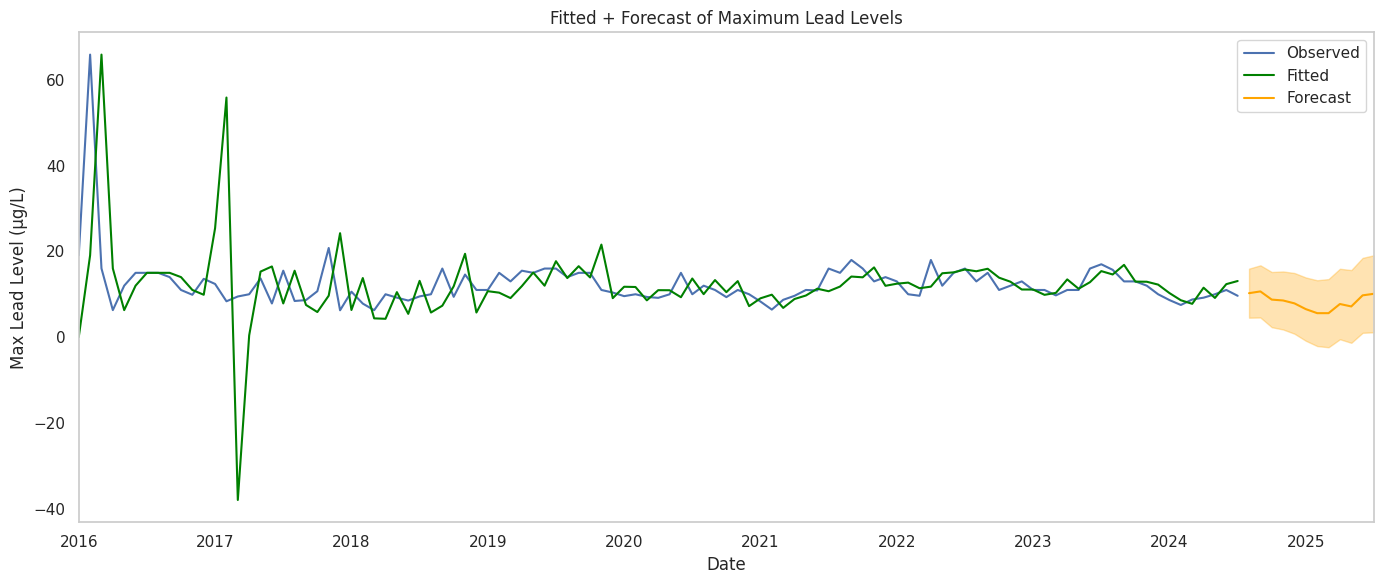

In [45]:
# Plots the observed data, model’s fitted values on the training data, and 12-step forecast with confidence intervals.
'''
Uses results.get_forecast() for future predictions.
Custom forecast index aligned from the next time point using pd.date_range.
Forecasted values and confidence intervals are plotted explicitly using the aligned forecast index.
Good control over the x-axis timeline for accurate future alignment.
'''

monthly_max = monthly_df.copy()
monthly_max.name = 'Max'  # Ensure it has a name, useful for legend

# Generate forecast and confidence intervals
forecast = results.get_forecast(steps=12)
ci = forecast.conf_int()

# Ensure forecast index starts from the next period after the last observation
forecast_index = pd.date_range(start=monthly_df.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# Plot observed values
ax = monthly_max.plot(label='Observed', figsize=(14, 6))

# Plot fitted values (the model's predictions for the training data)
results.fittedvalues.plot(ax=ax, label='Fitted', color='green')

# Align the forecast to the forecast_index
forecast.predicted_mean.index = forecast_index
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='orange')

# Add shaded confidence interval
ci.index = forecast_index
ax.fill_between(ci.index,
                ci.iloc[:, 0],
                ci.iloc[:, 1],
                color='orange', alpha=0.3)

# Labeling and title
plt.xlabel('Date')
plt.ylabel('Max Lead Level (µg/L)')
plt.title('Fitted + Forecast of Maximum Lead Levels')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


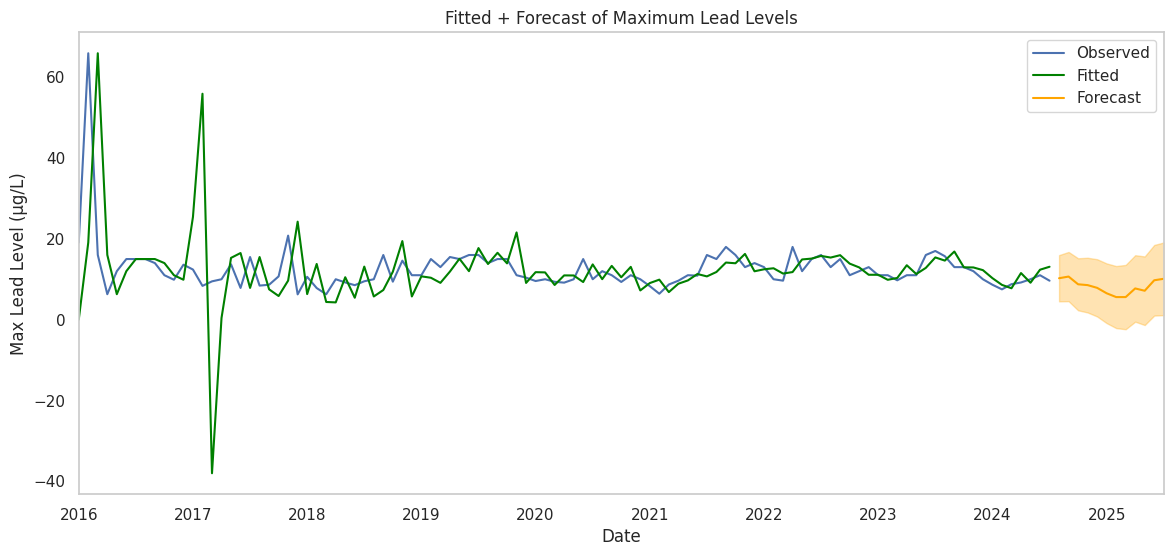

In [46]:
# Simplified Lead Level Forecast without Index Alignment(potentially less accurate)
'''
Does not manually set the forecast index.
Plots forecast directly as-is, which might cause misalignment if the model doesn't auto-set future dates.
Uses plt.fill_between() without confirming the index matches the timeline, which might raise an error if ci.index isn’t aligned with forecast.predicted_mean.
'''

monthly_max = monthly_df.copy()
monthly_max.name = 'Max'  # Ensure it has a name, useful for legend

forecast = results.get_forecast(steps=12)
ci = forecast.conf_int()

# Plot original and forecast
monthly_max.plot(label='Observed', figsize=(14, 6))
results.fittedvalues.plot(label='Fitted', color='green')
forecast.predicted_mean.plot(label='Forecast', color='orange')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='orange', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Max Lead Level (µg/L)')
plt.title('Fitted + Forecast of Maximum Lead Levels')
plt.legend()
plt.grid()
plt.show()




```
`# This is formatted as code`
```


Average 'Max' lead levels:

> Cold: ~7.37 µg/L  
> Warm: ~11.1 µg/L → significantly higher!

In [47]:
seasonal_avg = pd.DataFrame({
    'Season': ['Cold', 'Warm'],
    'Max': [7.366690, 11.101686]
})


# import seaborn as sns

# plt.figure(figsize=(8, 5))
# sns.barplot(data=seasonal_avg, x='Season', y='Max', palette='coolwarm')
# plt.title('Average Max Lead Level by Season')
# plt.ylabel('Max Lead Level (µg/L)')
# plt.grid(axis='y')
# plt.show()


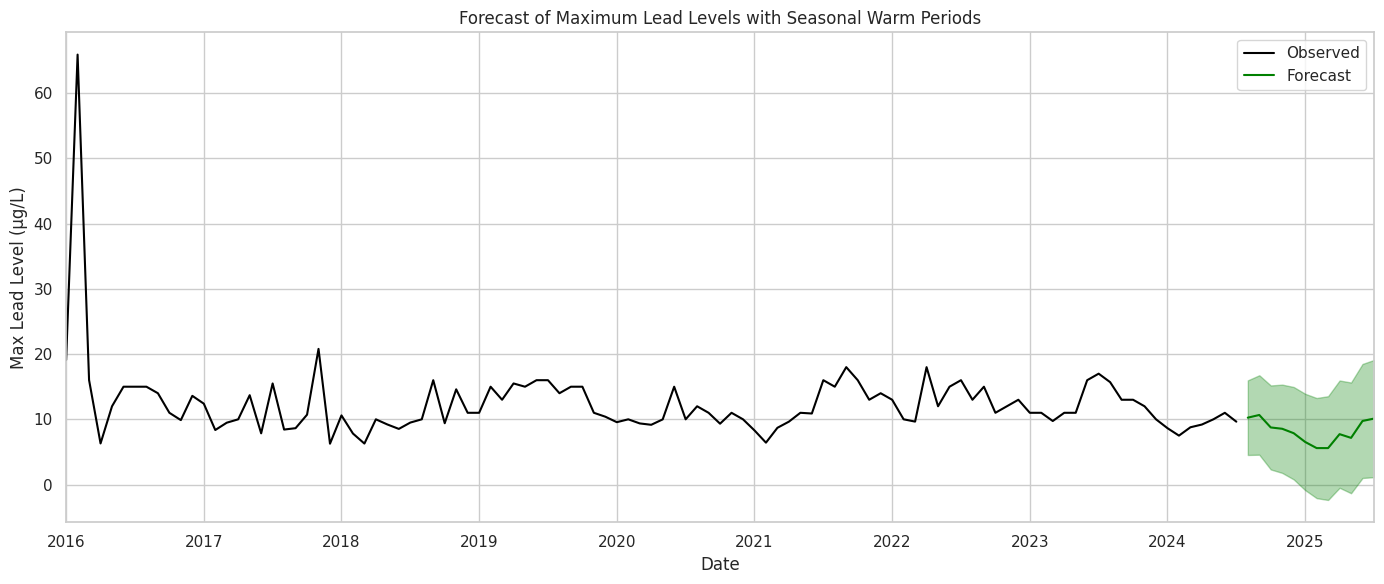

In [48]:
#  Forecast future lead levels while also highlighting warm seasons (May–September) and marking anomalies.

'''
Adds seasonal shading (axvspan) to visualize warm periods.
Forecast and confidence intervals are aligned like snippet 1.
'''

fig, ax = plt.subplots(figsize=(14, 6))

# Plot warm season bands
for year in range(2016, 2025):
    ax.axvspan(pd.to_datetime(f'{year}-05-01'), pd.to_datetime(f'{year}-09-30'),
               color='orange', alpha=0.1)

# Plot observed time series
monthly_df.plot(ax=ax, label='Observed', color='black')

# Align forecast with the appropriate time period
forecast_index = pd.date_range(start=monthly_df.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')
forecast.predicted_mean.index = forecast_index
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='green')

# Plot confidence interval
ci.index = forecast_index
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='green', alpha=0.3)

# Highlight anomalies
# ax.axvline(pd.to_datetime('2023-09-30'), color='red', linestyle='--', label='Sep Anomaly')
# ax.axvline(pd.to_datetime('2023-11-30'), color='purple', linestyle='--', label='Nov Anomaly')

# Labels, legend, and grid
ax.set_xlabel('Date')
ax.set_ylabel('Max Lead Level (µg/L)')
ax.set_title('Forecast of Maximum Lead Levels with Seasonal Warm Periods')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


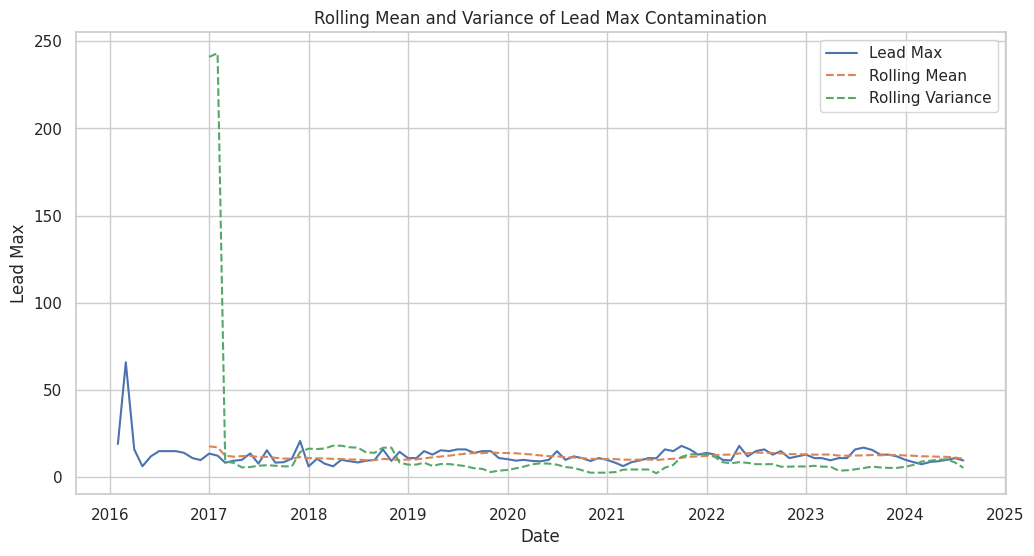

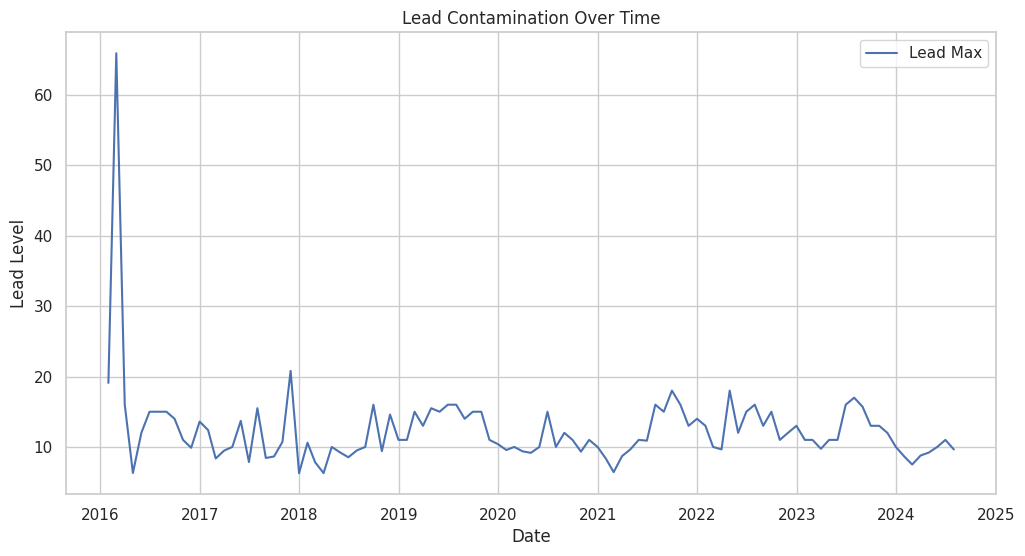

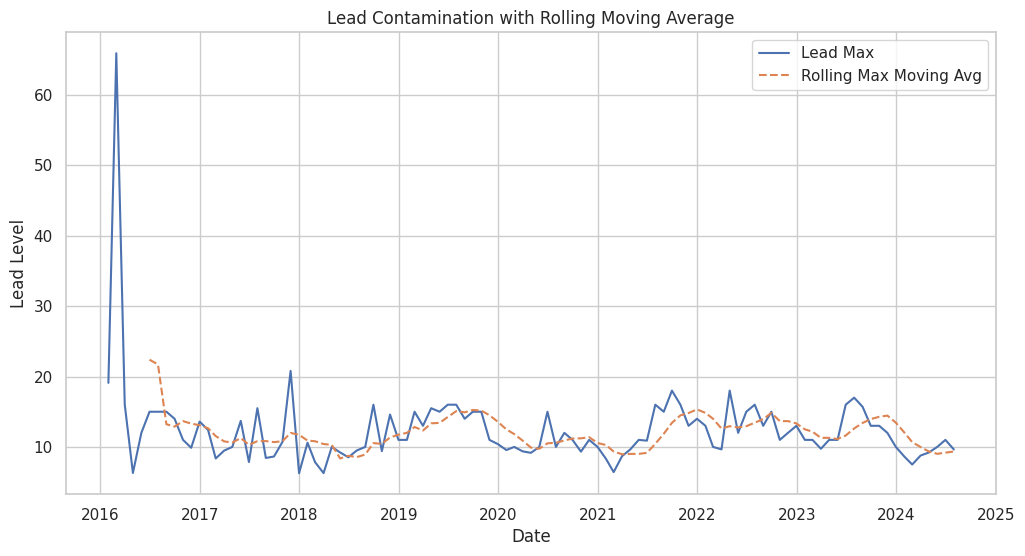

In [49]:
# Analyzes stationarity and trends using rolling mean and variance.
'''
Calculates rolling mean and variance (12-month window) to check for stationarity visually.
Creates a separate plot of the rolling moving average (6-month window) to visualize long-term trends.
Does not involve any forecasting.
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming monthly_df is already created with 'lead_max' as the column for the maximum lead level

# Plot rolling mean and variance
monthly_df = monthly_df.dropna()  # Drop rows with NaN values (no need for 'subset' argument)

rolling_mean = monthly_df.rolling(window=12).mean()
rolling_variance = monthly_df.rolling(window=12).var()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.plot(monthly_df.index, rolling_mean, label='Rolling Mean', linestyle='--')
plt.plot(monthly_df.index, rolling_variance, label='Rolling Variance', linestyle='--')
plt.legend()
plt.title('Rolling Mean and Variance of Lead Max Contamination')
plt.xlabel('Date')
plt.ylabel('Lead Max')
plt.show()

# Plot Max Lead Contamination over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.title('Lead Contamination Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()

# Add moving averages to the trend plot
rolling_max = monthly_df.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Lead Max')
plt.plot(monthly_df.index, rolling_max, label='Rolling Max Moving Avg', linestyle='--')
plt.title('Lead Contamination with Rolling Moving Average')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.legend()
plt.show()

# Some Other Analysis

## Monthly 90th Percentile Max Lead by ZIP Code (Grouped by Calendar Month)

In [51]:
import geopandas as gpd

# Load Chicago ZIP Code boundaries from public data source (City of Chicago Data Portal)
zip_url = "https://data.cityofchicago.org/api/geospatial/unjd-c2ca?method=export&format=GeoJSON"
gdf = gpd.read_file(zip_url)

# Preview the data
gdf.head()


,objectid,zip,shape_area,shape_len,geometry
0,33,60647,106052287.488,42720.0444058,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,60639,127476050.762,48103.7827213,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,60707,45069038.4783,27288.6096123,"MULTIPOLYGON (((-87.785 41.90915, -87.78531 41..."
3,36,60622,70853834.3797,42527.9896789,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,60651,99039621.2518,47970.1401531,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


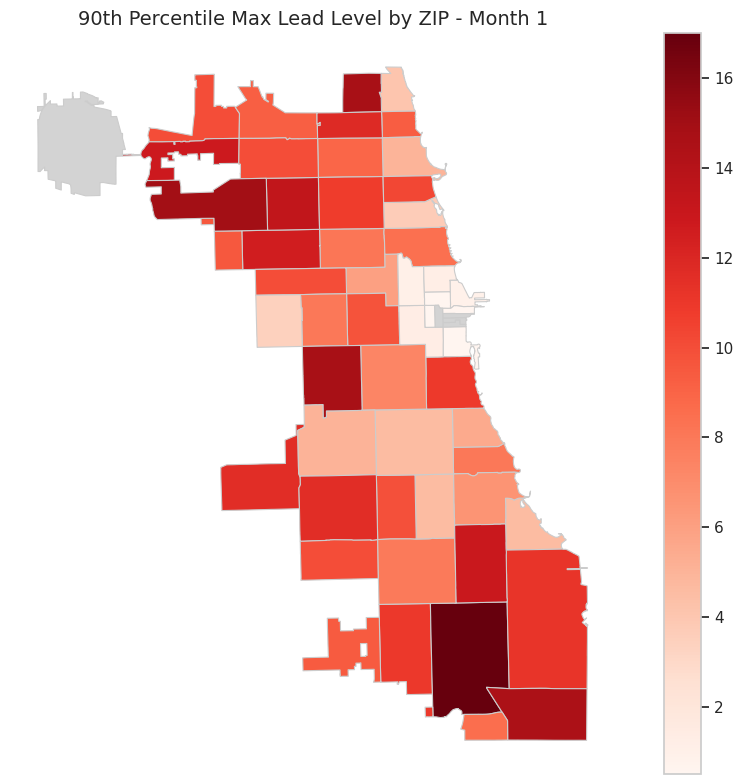

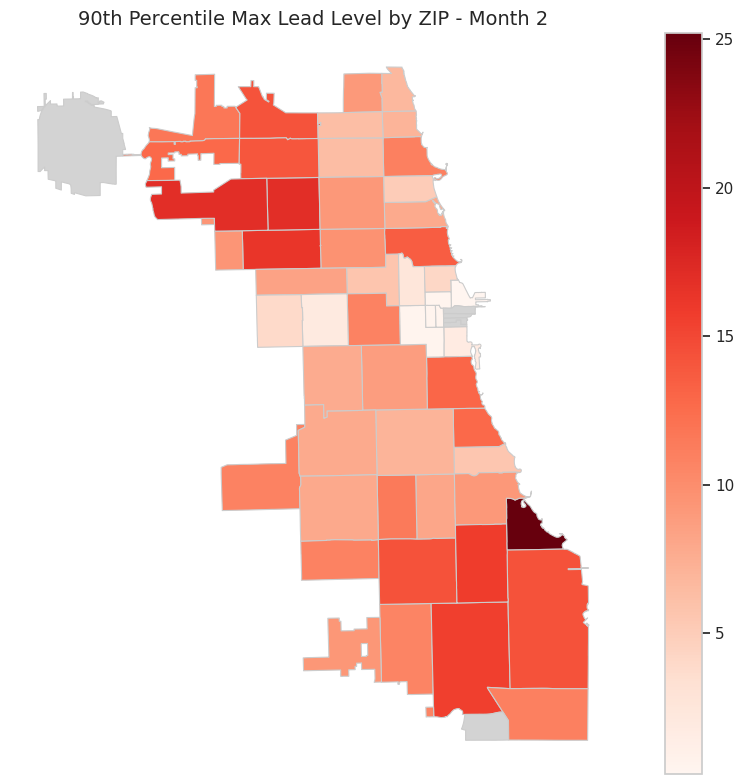

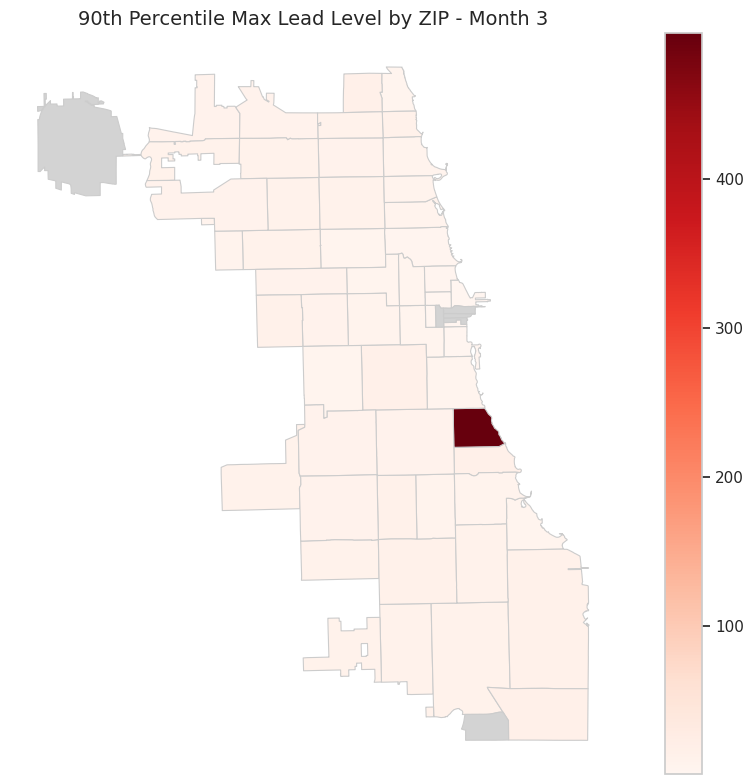

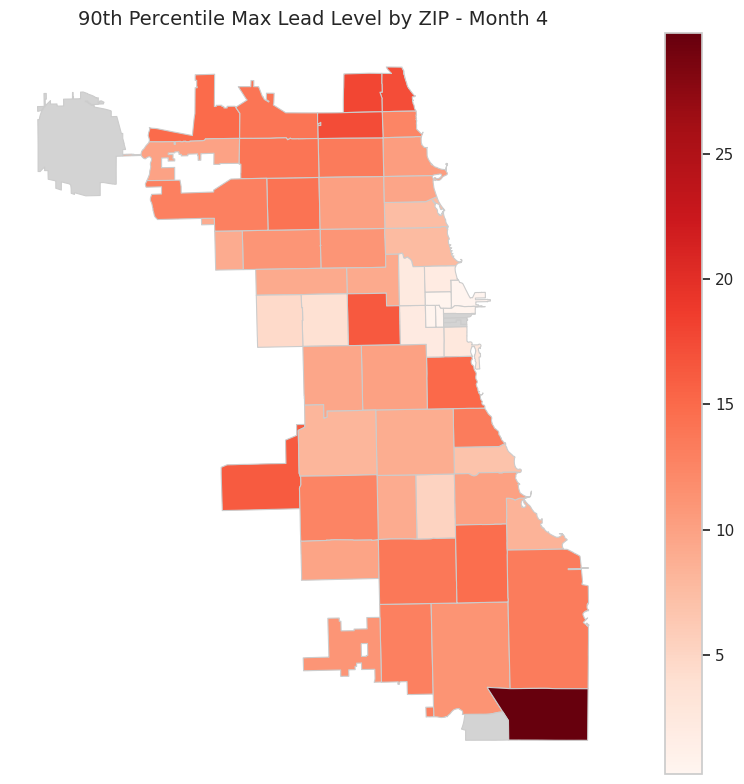

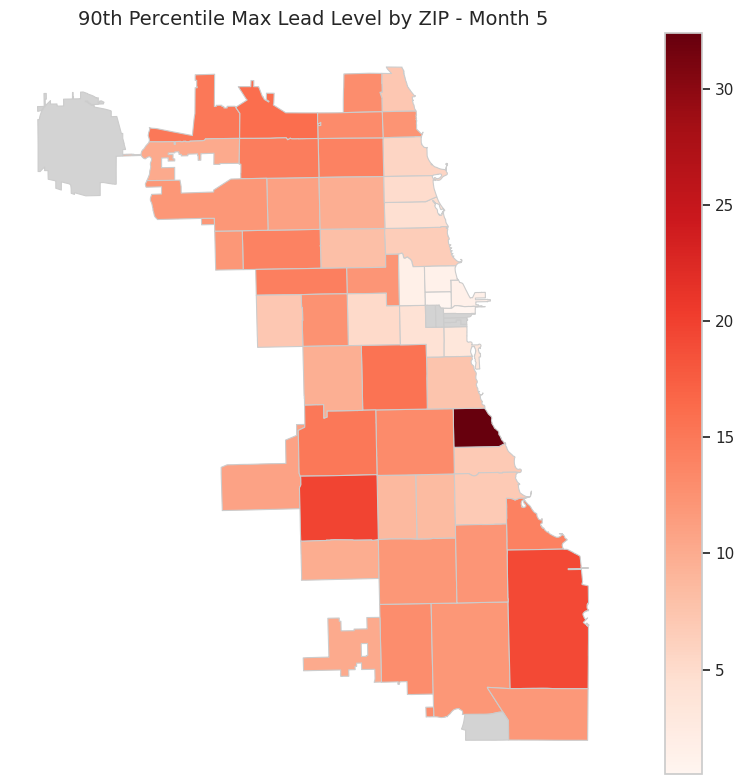

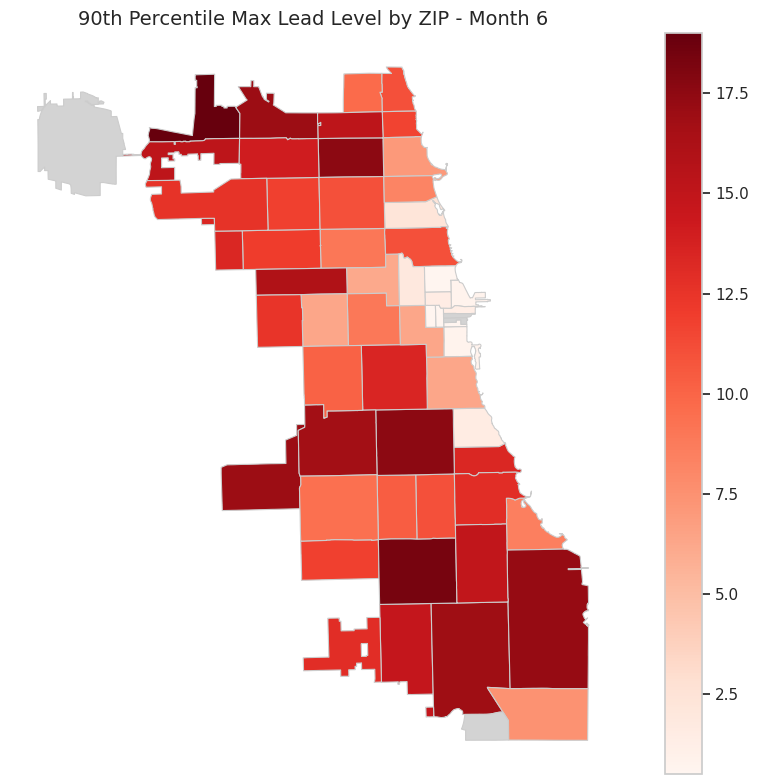

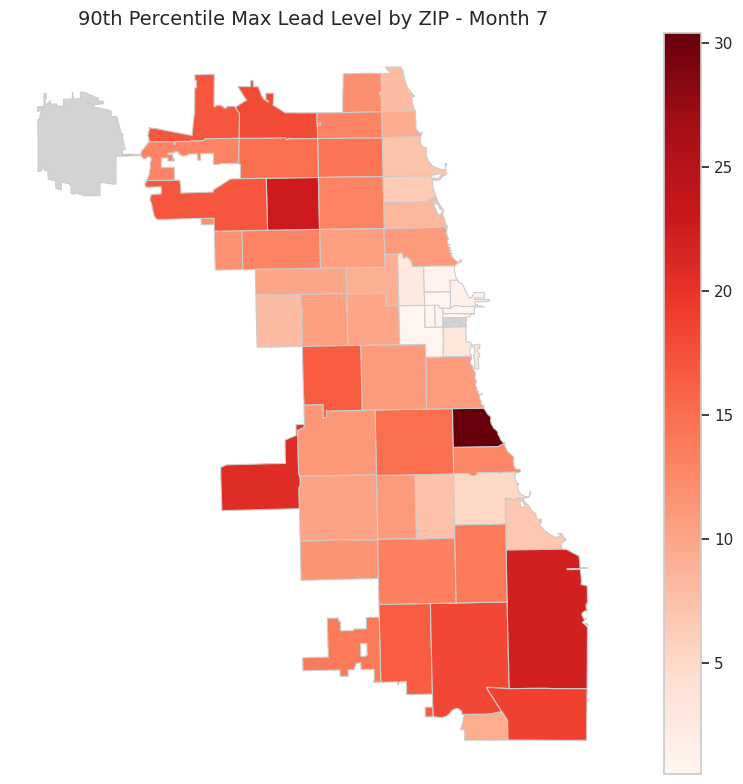

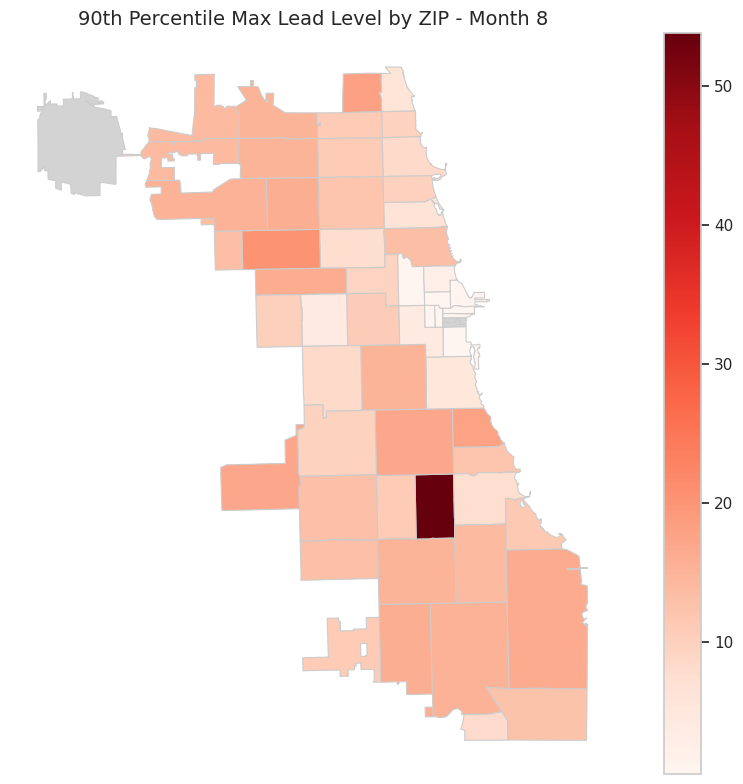

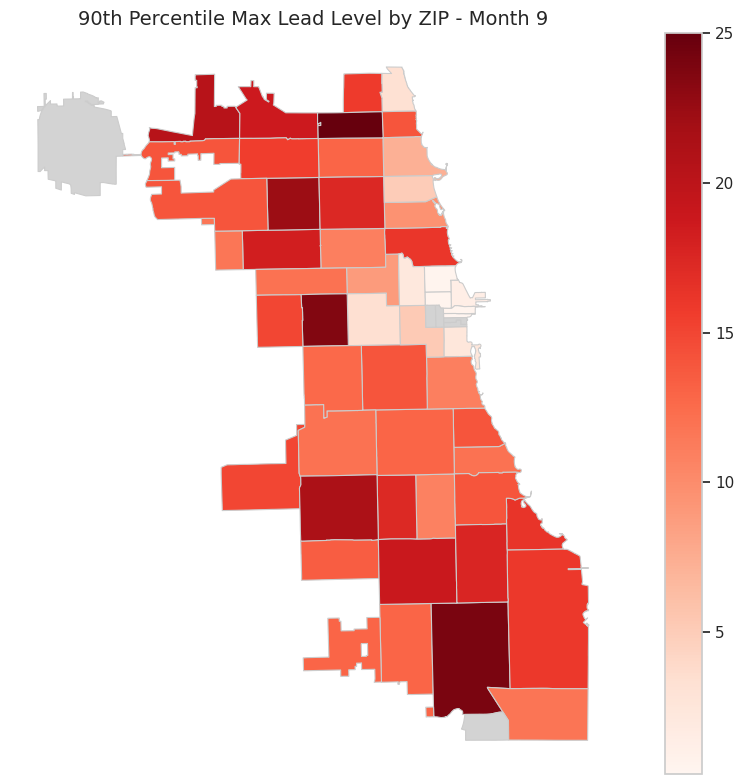

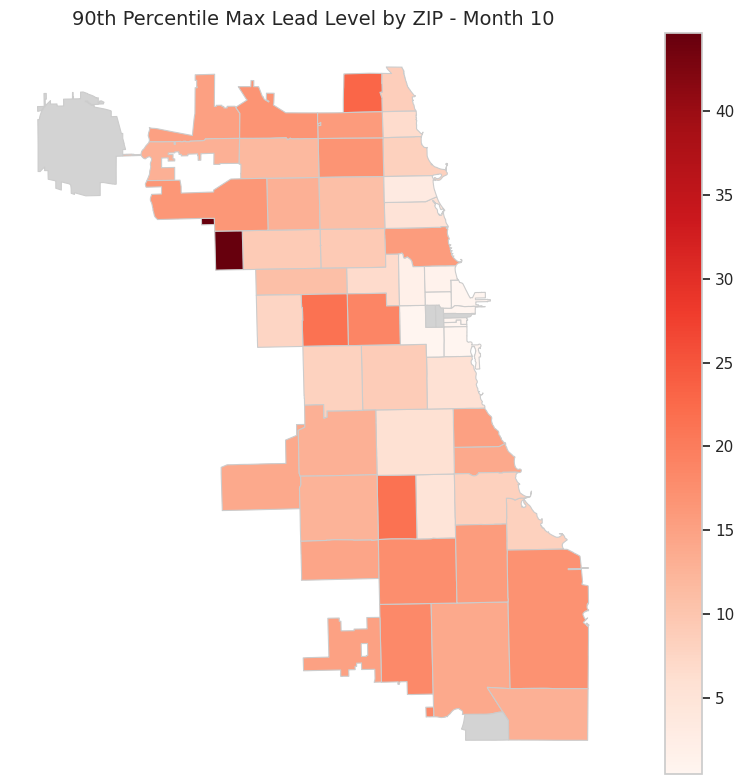

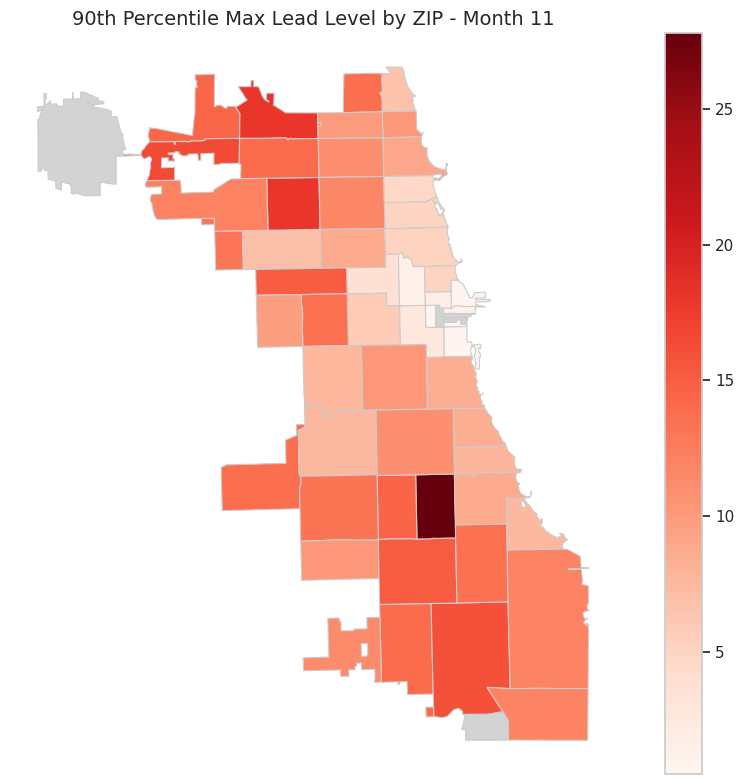

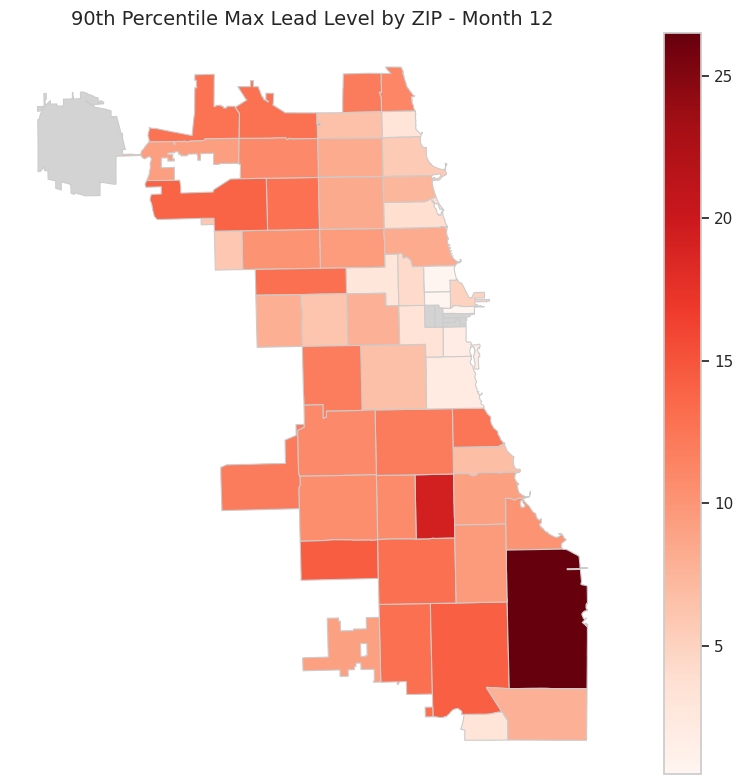

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/IPRO/boots_1.csv')

# Convert Sample Date
df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors='coerce')
df = df.dropna(subset=['Sample Date'])

# Clean ZIP codes (extract 5-digit)
df['ZIP'] = df['property_zip'].astype(str).str.extract(r'(\d{5})')

# Extract month
df['Month'] = df['Sample Date'].dt.month

# Convert 'Max' to numeric
df['Max'] = pd.to_numeric(df['Max'], errors='coerce')

# Drop NaNs in ZIP or Max
df = df.dropna(subset=['ZIP', 'Max'])

# Calculate 90th percentile lead level for each ZIP and month
monthly_90th_by_zip = df.groupby(['ZIP', 'Month'])['Max'].quantile(0.9).reset_index()
monthly_90th_by_zip.columns = ['ZIP', 'Month', 'Lead90']

# Optional: Load ZIP shapefile for Chicago
# Replace with correct path to your shapefile
# Load Chicago ZIP boundaries from City of Chicago's Data Portal
zip_url = "https://data.cityofchicago.org/api/geospatial/unjd-c2ca?method=export&format=GeoJSON"
gdf = gpd.read_file(zip_url)


# Standardize ZIP column name
gdf['ZIP'] = gdf['zip'].astype(str).str.zfill(5)


# Ensure ZIP columns match format
gdf['ZIP'] = gdf['ZIP'].astype(str).str.zfill(5)

# Plot maps for each month
for month in range(1, 13):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Merge monthly data with GeoDataFrame
    month_data = monthly_90th_by_zip[monthly_90th_by_zip['Month'] == month]
    merged = gdf.merge(month_data, on='ZIP', how='left')

    # Plot
    merged.plot(column='Lead90',
                cmap='Reds',
                linewidth=0.8,
                edgecolor='0.8',
                legend=True,
                ax=ax,
                missing_kwds={"color": "lightgrey", "label": "No data"})

    ax.set_title(f"90th Percentile Max Lead Level by ZIP - Month {month}", fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

## Seasonal Risk Score by ZIP Code

In [55]:
# Define warm (May–Sep) and cold (Oct–Apr) months
warm_months = [5, 6, 7, 8, 9]
cold_months = [1, 2, 3, 4, 10, 11, 12]

# Tag seasons
df['Season'] = df['Month'].apply(lambda x: 'Warm' if x in warm_months else 'Cold')

# Group by ZIP and Season, compute 90th percentile of Max
seasonal_zip = df.groupby(['ZIP', 'Season'])['Max'].quantile(0.9).unstack()

# Compute seasonal risk score
seasonal_zip['RiskScore'] = seasonal_zip['Warm'] / seasonal_zip['Cold']

# Sort by score
seasonal_zip_sorted = seasonal_zip.sort_values(by='RiskScore', ascending=False)

# Display top 15 most seasonally sensitive ZIPs
print("Top 15 ZIPs with highest summer sensitivity:")
display(seasonal_zip_sorted.head(15))


Top 15 ZIPs with highest summer sensitivity:


Season,Cold,Warm,RiskScore
ZIP,,,
60605,0.50,1.74,3.480000
60609,9.34,15.80,1.691649
60608,8.95,15.00,1.675978
60607,2.82,4.47,1.585106
60622,6.26,9.30,1.485623
60624,8.54,12.60,1.475410
60649,8.10,11.70,1.444444
60644,8.27,11.80,1.426844
60615,8.42,11.90,1.413302


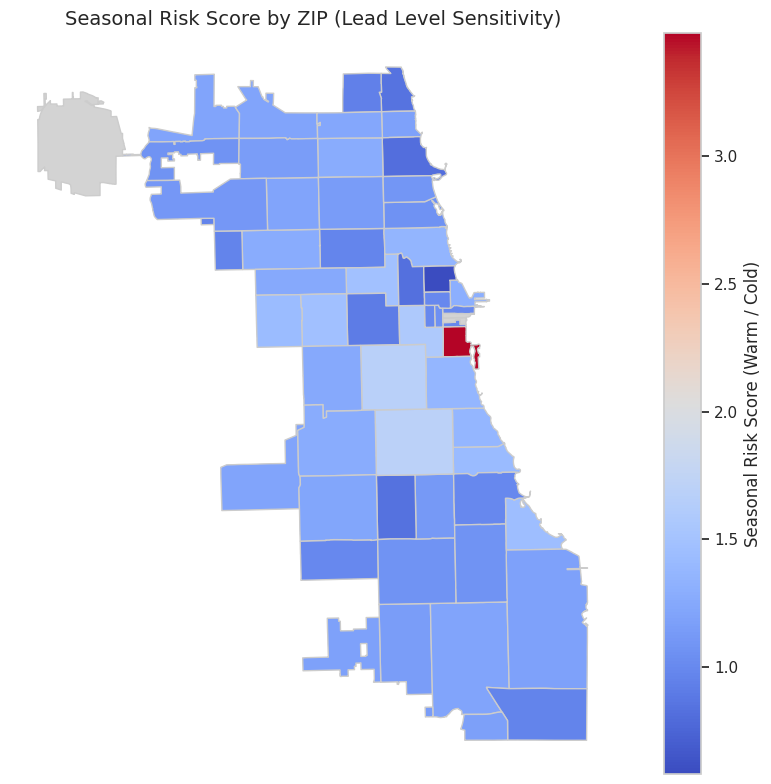

In [56]:
# Merge with GeoDataFrame
gdf_risk = gdf.merge(seasonal_zip, on='ZIP', how='left')

# Plot the Risk Score
fig, ax = plt.subplots(figsize=(10, 8))
gdf_risk.plot(column='RiskScore',
              cmap='coolwarm',
              legend=True,
              edgecolor='0.8',
              ax=ax,
              missing_kwds={"color": "lightgrey", "label": "No data"},
              legend_kwds={"label": "Seasonal Risk Score (Warm / Cold)"})

ax.set_title("Seasonal Risk Score by ZIP (Lead Level Sensitivity)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()
